In [1]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import preliz as pz
import pymc as pm
from scipy.special import expit as logistic

In [2]:
az.style.use('arviz-doc')

In [3]:
%%HTML
<style>

.CodeMirror {
    width: 100vw;
}

.container {
    width: 99% !important;
}

.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}


body {
  font-family: Ubuntu;
  background: #F0F0F0;
  background-color: #F0F0F0;
}


.reveal h1,
.reveal h2,
.reveal h3,
.reveal h4,
.reveal h5,
.reveal h6 {
  margin: 0 0 20px 0;
  color: #2a2eec;
  font-family: Ubuntu;
  line-height: 0.9em;
  letter-spacing: 0.02em;
  text-transform: none;
  text-shadow: none;
}

.reveal blockquote {
  display: block;
  position: relative;
  background: #fa7c17;
  border-radius: 15px;
  box-shadow: 0px 0px 2px rgba(0, 0, 0, 0.2);
  font-weight: bold;
}

</style>

In [4]:
from traitlets.config.manager import BaseJSONConfigManager
path = "/home/osvaldo/anaconda3/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "serif",
              "transition": "zoom",
              "start_slideshow_at": "selected",
              "controls": "True",
              "progress": "False",
              "shortcut": "False"});

<center><img src="img/Logo_UNSAM.png" width="200">
<br>
<br>
<h1 align="center">Flujo de trabajo Bayesiano</h1>    


<br>
<br>
<br>
<br>
<br>

## Objetivos

<br>
<br>

* Familiarizarse con el Análisis Exploratorio de Modelos Bayesianos 
* Comprender la necesidad del flujo de trabajo bayesiano
* Familirizarse con pruebas predictivas a priori y a posteriori
* Aprender sobre las bases de la comparación de modelos
* Aprender elementos para el diagnóstico del muestreo (MCMC)

## No solo de inferencia vive el hombre

<br>
<br>

* El enfoque Bayesiano proporciona una forma eficaz de manejar la incertidumbre en las observaciones, los parámetros del modelo y la estructura del modelo utilizando la teoría de la probabilidad.

* Los lenguajes de programación probabilística facilitan la especificación y el ajuste de los modelos Bayesianos.

* Sin embargo, son muchas las opciones con respecto a la construcción, evaluación y uso de estos modelos, además de los aspecto computacionales de la propia inferencia.

## Hay vida despúes (y antes) de la inferencia Bayesiana

<br>

Al trabajar con modelos Bayesianos, hay una serie de tareas relacionadas que deben abordarse además de la inferencia:

* Diagnósticos de la calidad del muestreo
* Crítica del modelo, incluidas las evaluaciones tanto de los supuestos del modelo como de las predicciones del modelo
* Comparación de modelos, incluida la selección de modelos/variables y el promediado de modelos
* Preparación de los resultados para una audiencia en particular

## Análisis exploratorio de modelos Bayesianos

<br>
<br>

“El análisis exploratorio de datos busca revelar la estructura o descripciones simples en los datos.
Observamos números o gráficos e intentamos encontrar patrones. Seguimos pistas sugeridas por
la información previa, la imaginación, los patrones percibidos y la experiencia con otros análisis de
datos”. - Persi Diaconis 

* En modelado Bayesiano, usamos muchas ideas de EDA, pero aplicada a los modelos (no solo a los datos). 

## Flujo de trabajo Bayesiano

<br>

* Todas estas tareas, se realizan de forma iterativa (e interactiva) y podemos enmarcarlas en un "flujo de trabajo"

<br>
<br>
<center>
Ejemplo --> Caso de estudio --> Flujo de trabajo --> Método --> Teoría
</center>

[Bayesian Workflow](https://arxiv.org/abs/2011.01808)

## Estadística Bayesiana en 3 pasos (flujo de  trabajo Bayesiano I)

<br>
 

1. **Crear un modelo probabilista**. Especificar un modelo de probabilidad que incluya algún tipo de conocimiento previo sobre los parámetros del modelo


2. **Condicionar el modelo a los datos observados**. Usando el teorema de Bayes la distribución a priori es actualizada de acuerdo a los datos observados,  obteniendose la distribución _a posteriori_.


3. **Evaluar el ajuste del modelo a los datos y la sensibilidad de las conclusiones a cambios en los supuestos del modelo**.

## Flujo de trabajo Bayesiano II
<center>
<img src="img/bayesian_workflow.png" width=500>
</center>

## Flujo de trabajo Bayesiano III
<center>
<img src="../img/Bayesian_workflow.png" width=700>
</center>

## Flujo de trabajo Bayesiano IV
<center>
<img src="img/Bayesian_workflow.png" width=700>
</center>

## Nosotros vamos a discutir 3 grandes tareas

<br>

* Evaluar o criticar modelos
    
* Comparar modelos

* Diagnósticar el muestreo

## Pruebas predictivas a priori

<br>

La distribución predictiva a priori se define como:


$$
p(y^\ast) =  \int_{\Theta} p(y^\ast \mid \theta) \; p(\theta) \; d\theta
$$


> Una prueba predictiva a priori consiste en comparar $p(y^\ast)$ con nuestro conocimiento de dominio 

### Predadores y presas

* Estamos interesados en modelar la relación entre las masas de organismos que son presas y organismos que son predadores
* Al analizar los datos observamos que las masas varían en varios órdenes de magnitud
* Esto sugiere que quizá sea conveniente trabajar en escala logarítmica.
* Es de esperar que, al menos dentro de cierto rango, el tamaño de un depredador y de su presa covaríen.

In [5]:
pp_mass = pd.read_csv("../datos/pp_mass.csv")
pp_mass["predator_log"] = np.log(pp_mass["predator"])
pp_mass["prey_log"] = np.log(pp_mass["prey"])

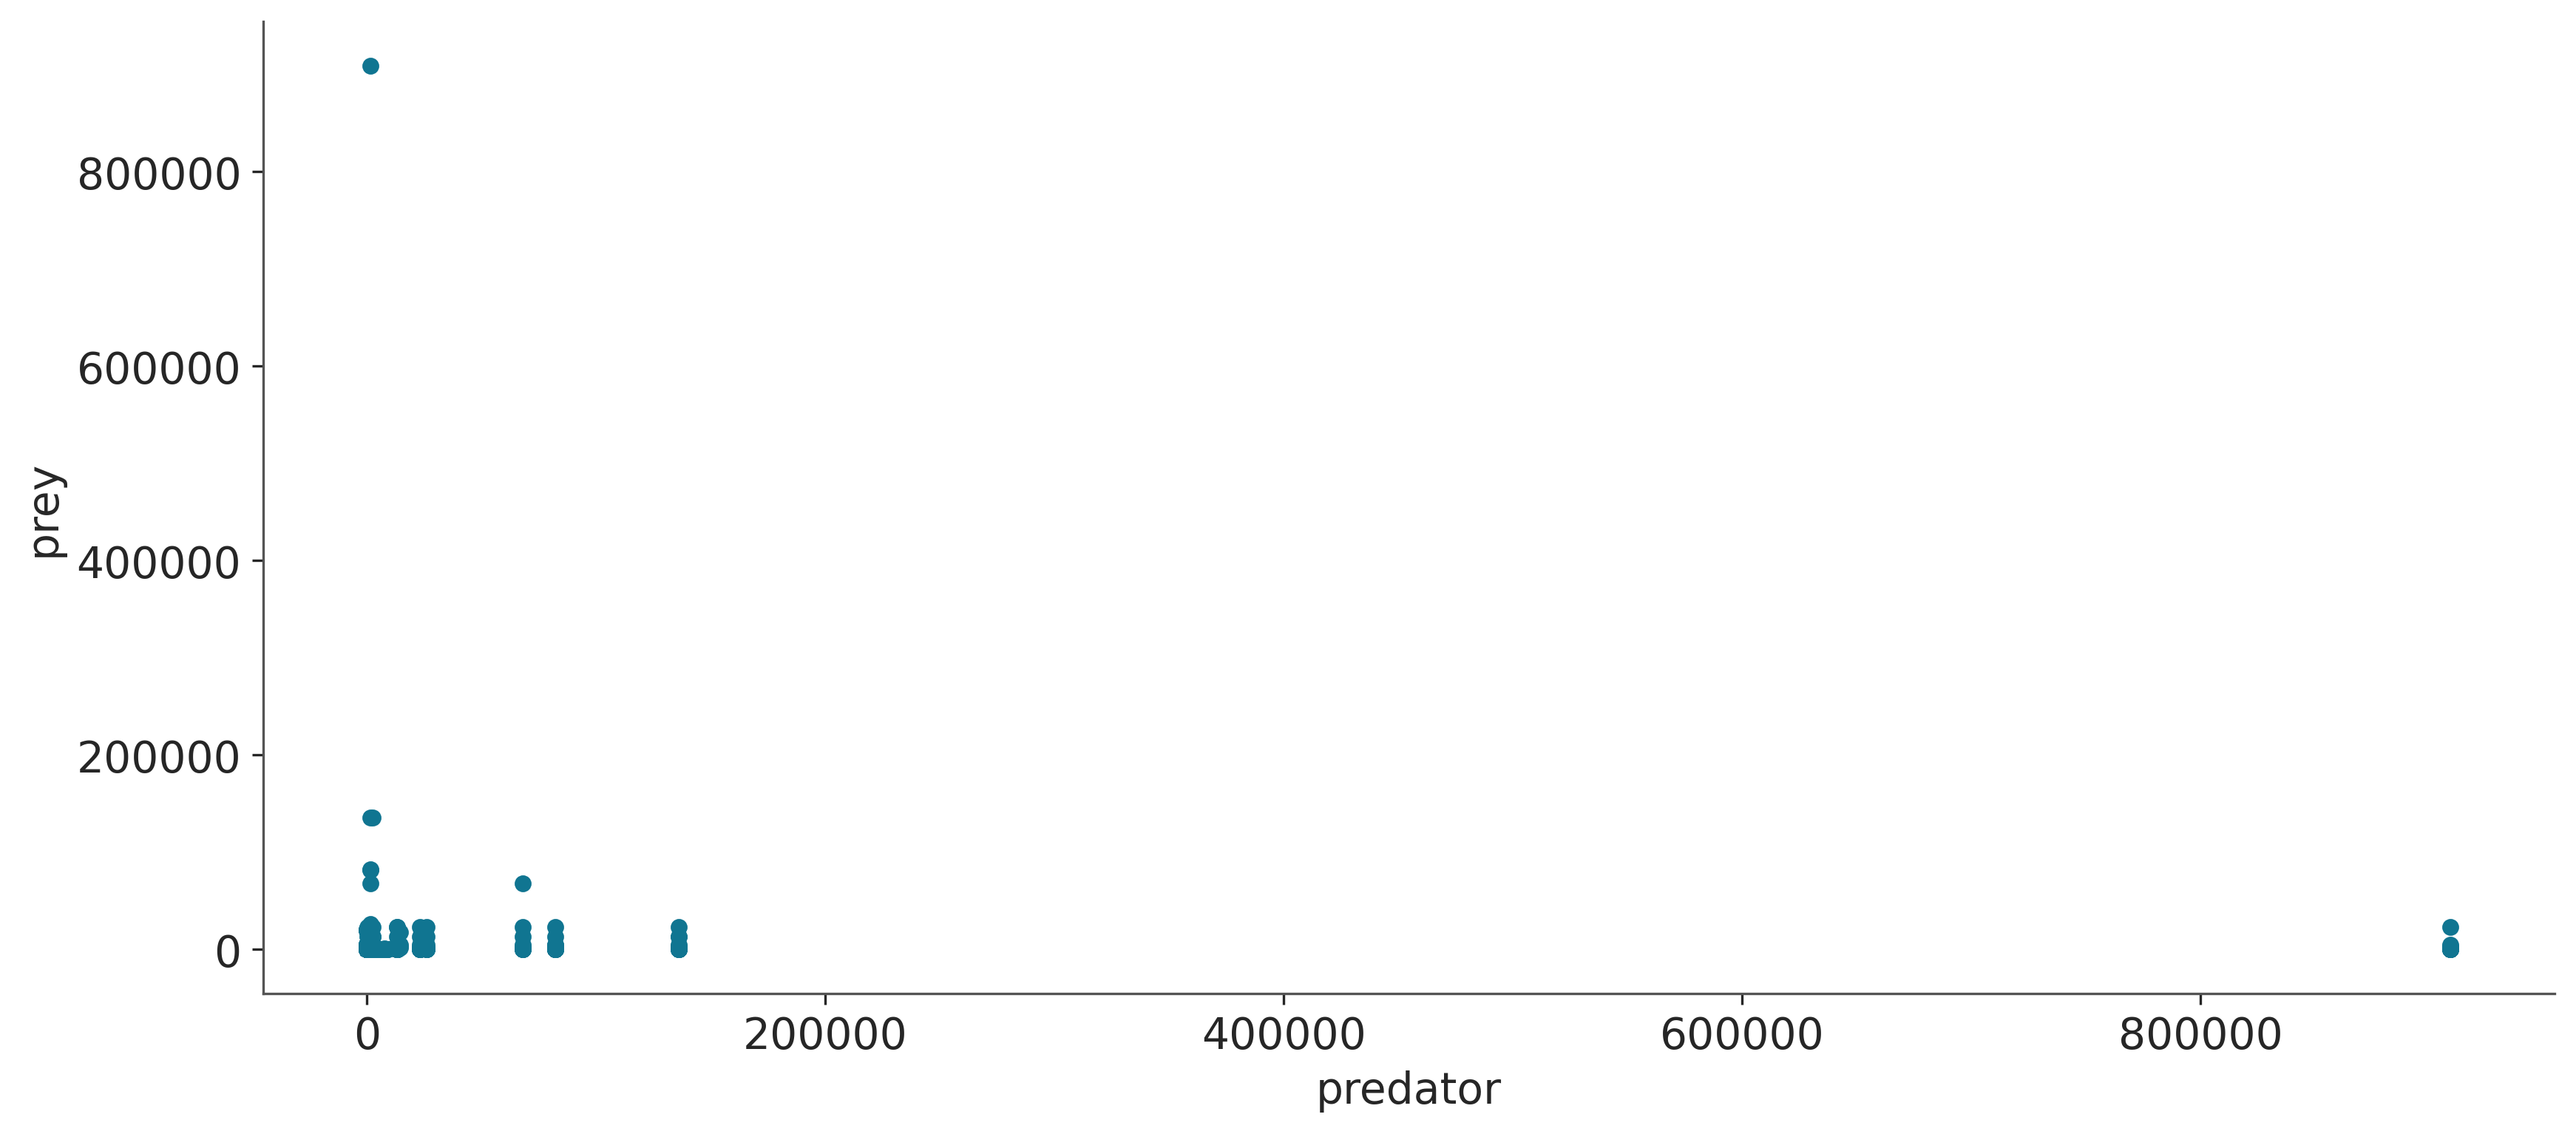

In [6]:
pp_mass.plot("predator", "prey", kind="scatter");

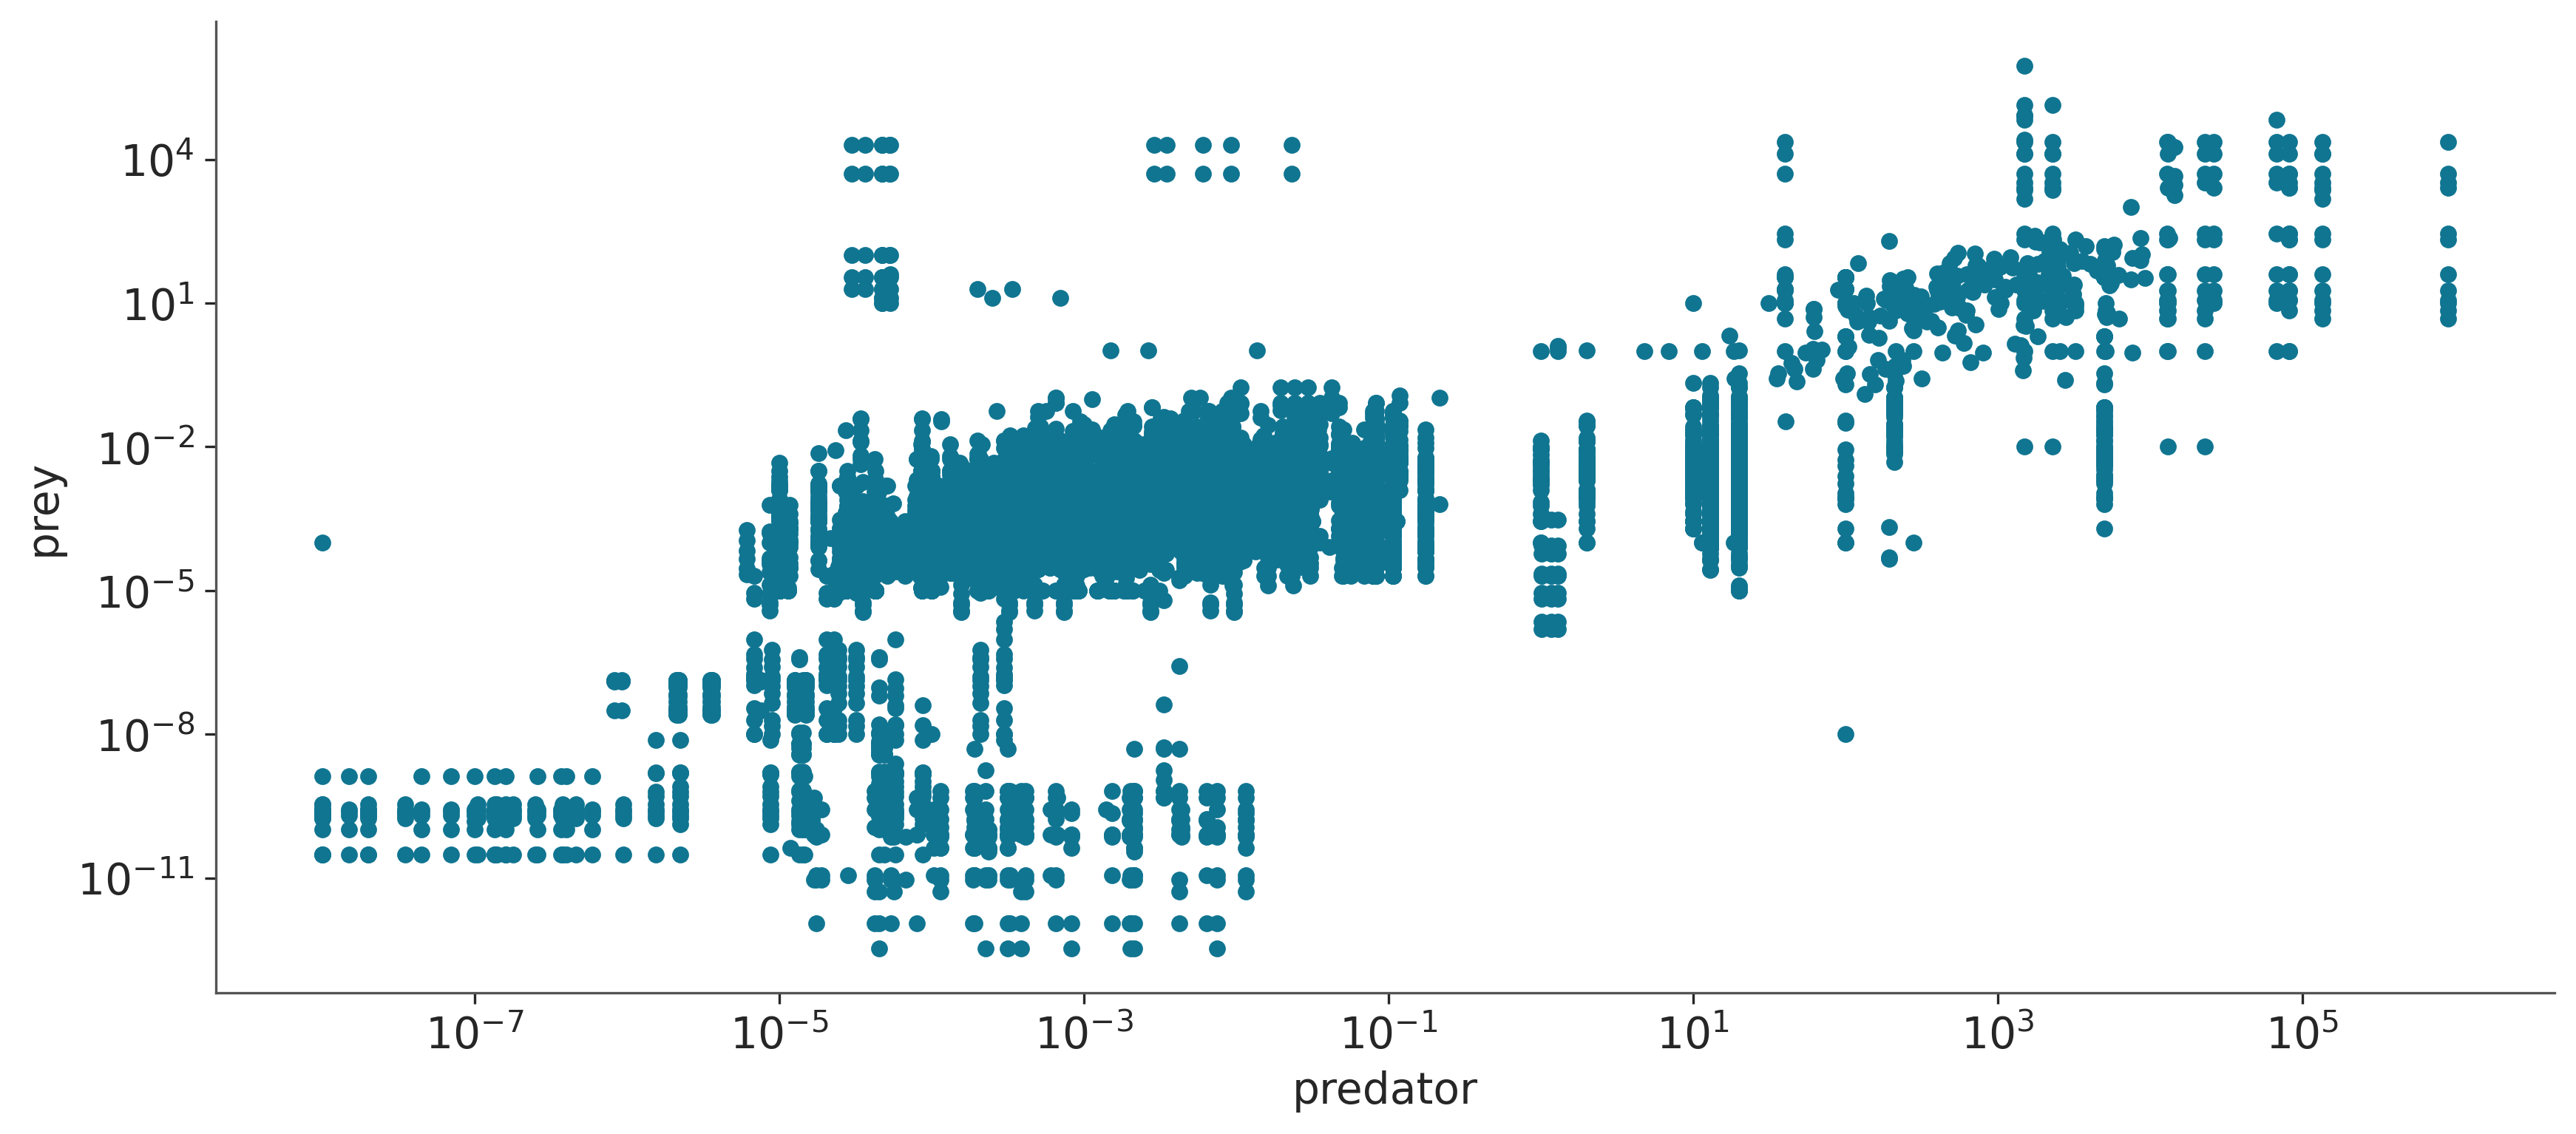

In [7]:
pp_mass.plot("predator", "prey", kind="scatter", loglog=True);

 Entonces un modelo podría ser

\begin{align}
    \alpha =& Normal(\cdots, \cdots) \\
    \beta =& Normal(\cdots, \cdots) \\
    \mu =& \alpha + \beta * log(\text{masa_presa}) \\
    \sigma =& HalfNormal(\cdots) \\
    log(\text{masa_predador}) =& Normal(\mu, \sigma)
\end{align}

In [8]:
with pm.Model() as model:
    α = pm.Normal("α", 0, 100)
    β = pm.Normal("β", 0, 100)
    σ = pm.HalfNormal("σ", 5)
    presa = pm.Normal("presa", α + β * pp_mass["prey_log"], σ, 
                      observed=pp_mass["predator_log"])
    idata = pm.sample_prior_predictive(samples=100)

Sampling: [presa, α, β, σ]


In [9]:
idata

Inference data with groups:
	> prior
	> prior_predictive
	> observed_data

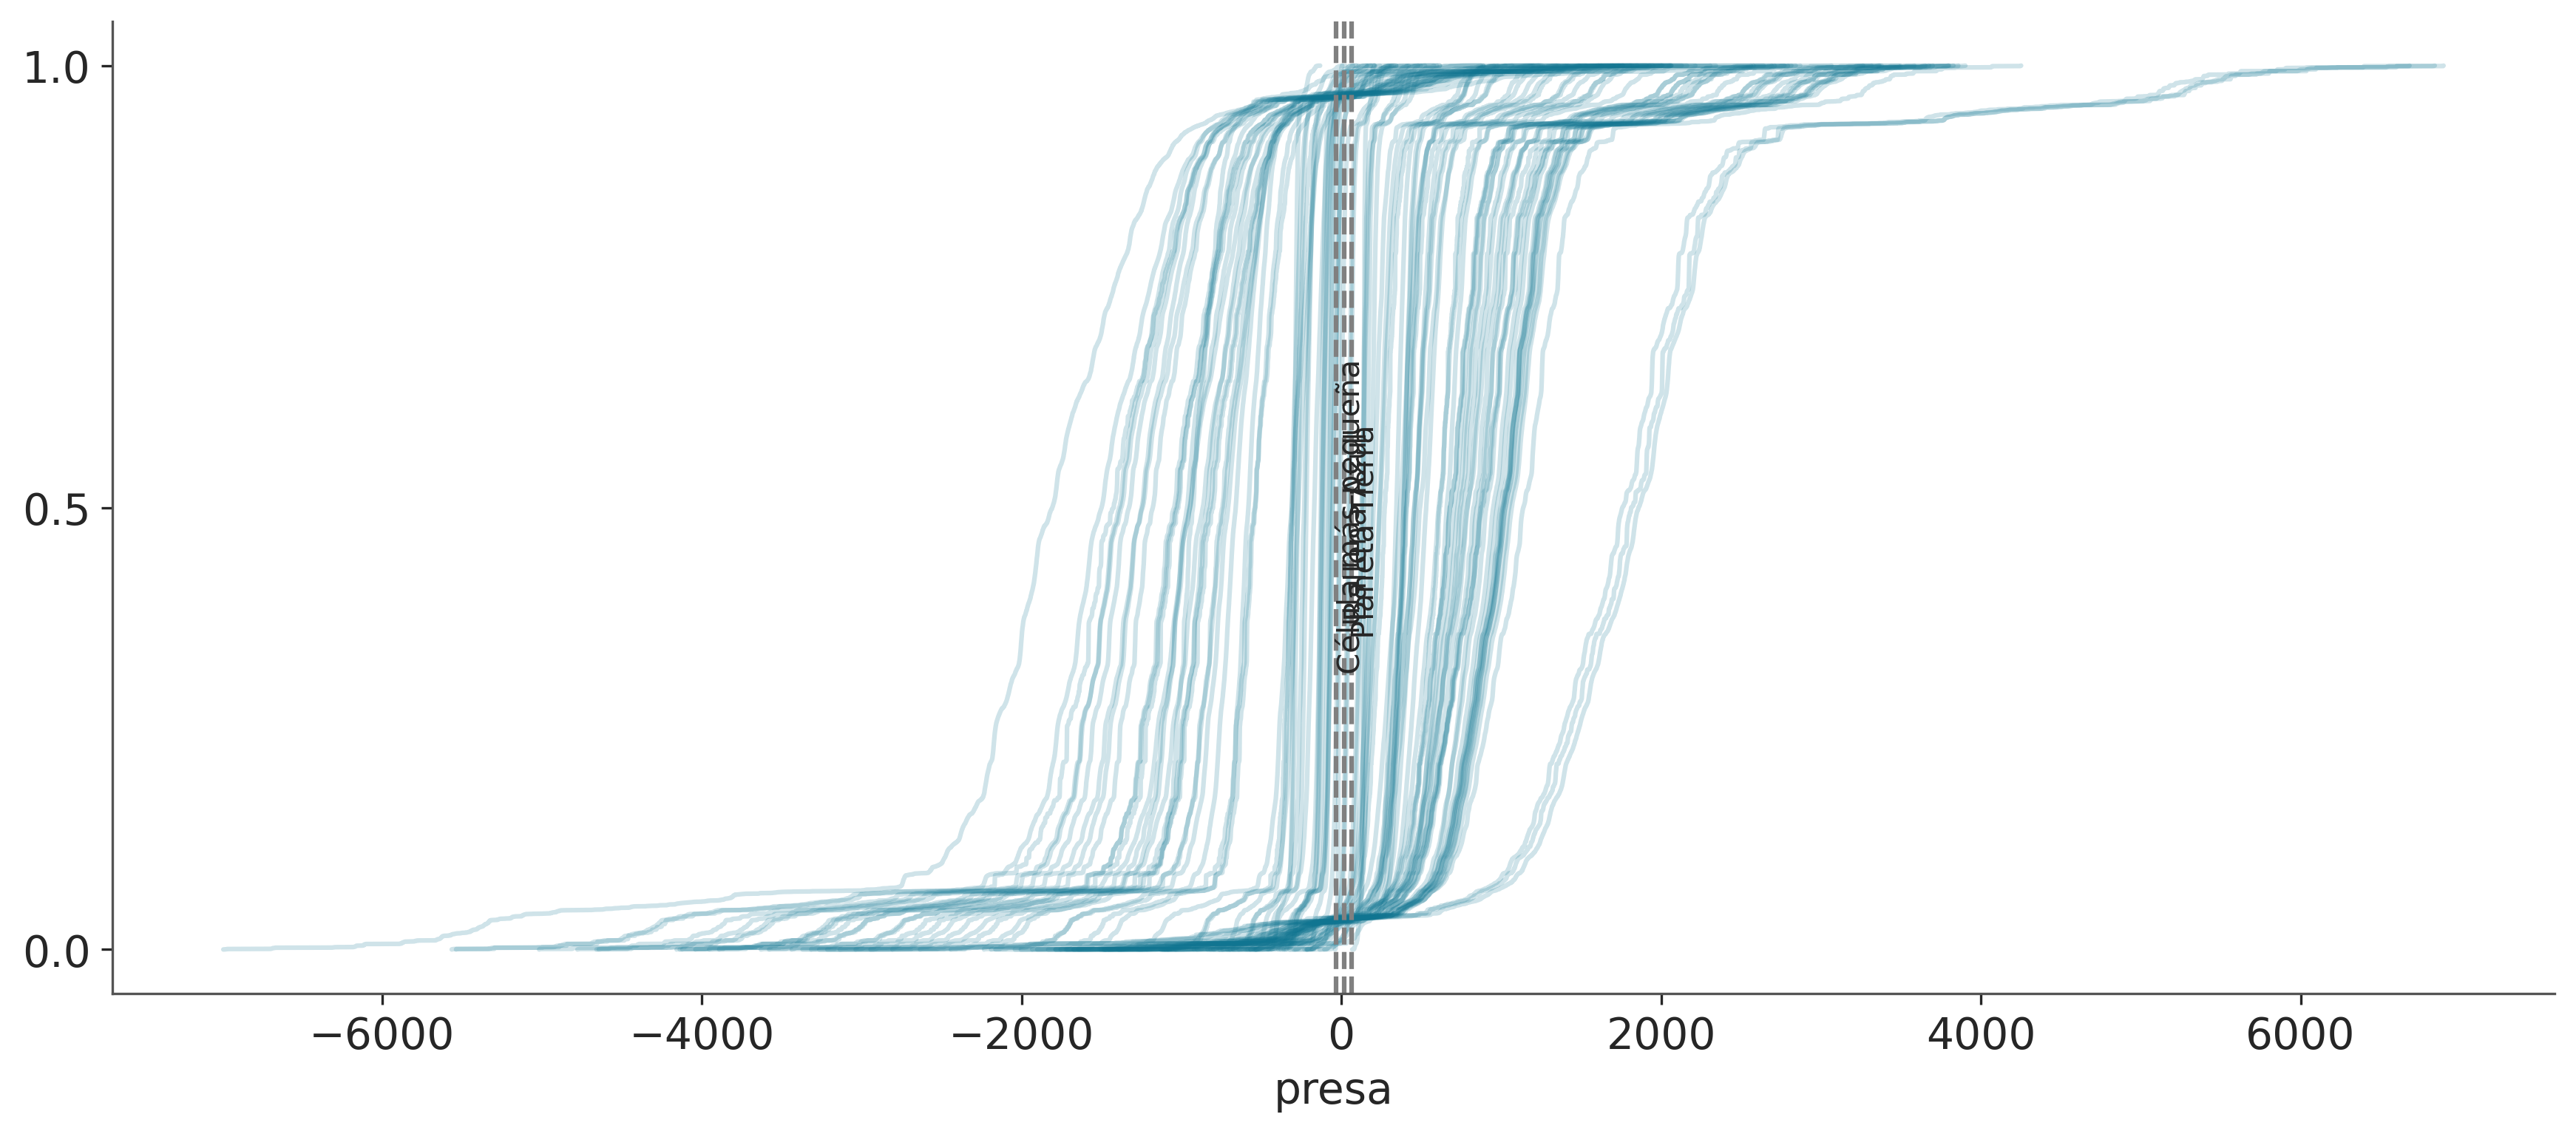

In [10]:
ax = az.plot_ppc(idata, group="prior", kind="cumulative", mean=False, legend=False)

# valores de referencia en escala log
refs = {"Planeta Tierra":np.log(5.97e+27),
        "Ballena Azul":np.log(1.5e8), 
        "Célula más pequeña":np.log(1e-14)}

for key, val in refs.items():
    ax.axvline(val, ls="--", color="0.5")
    ax.text(val-7, 0.5-(len(key)/100), key, rotation=90)

In [11]:
with pm.Model() as model:
    α = pm.Normal("α", 0, 1)
    β = pm.Normal("β", 0, 1)
    σ = pm.HalfNormal("σ", 5)
    presa = pm.Normal("presa", α + β * pp_mass["prey_log"], σ, observed=pp_mass["predator_log"])
    idata = pm.sample_prior_predictive(samples=100)

Sampling: [presa, α, β, σ]


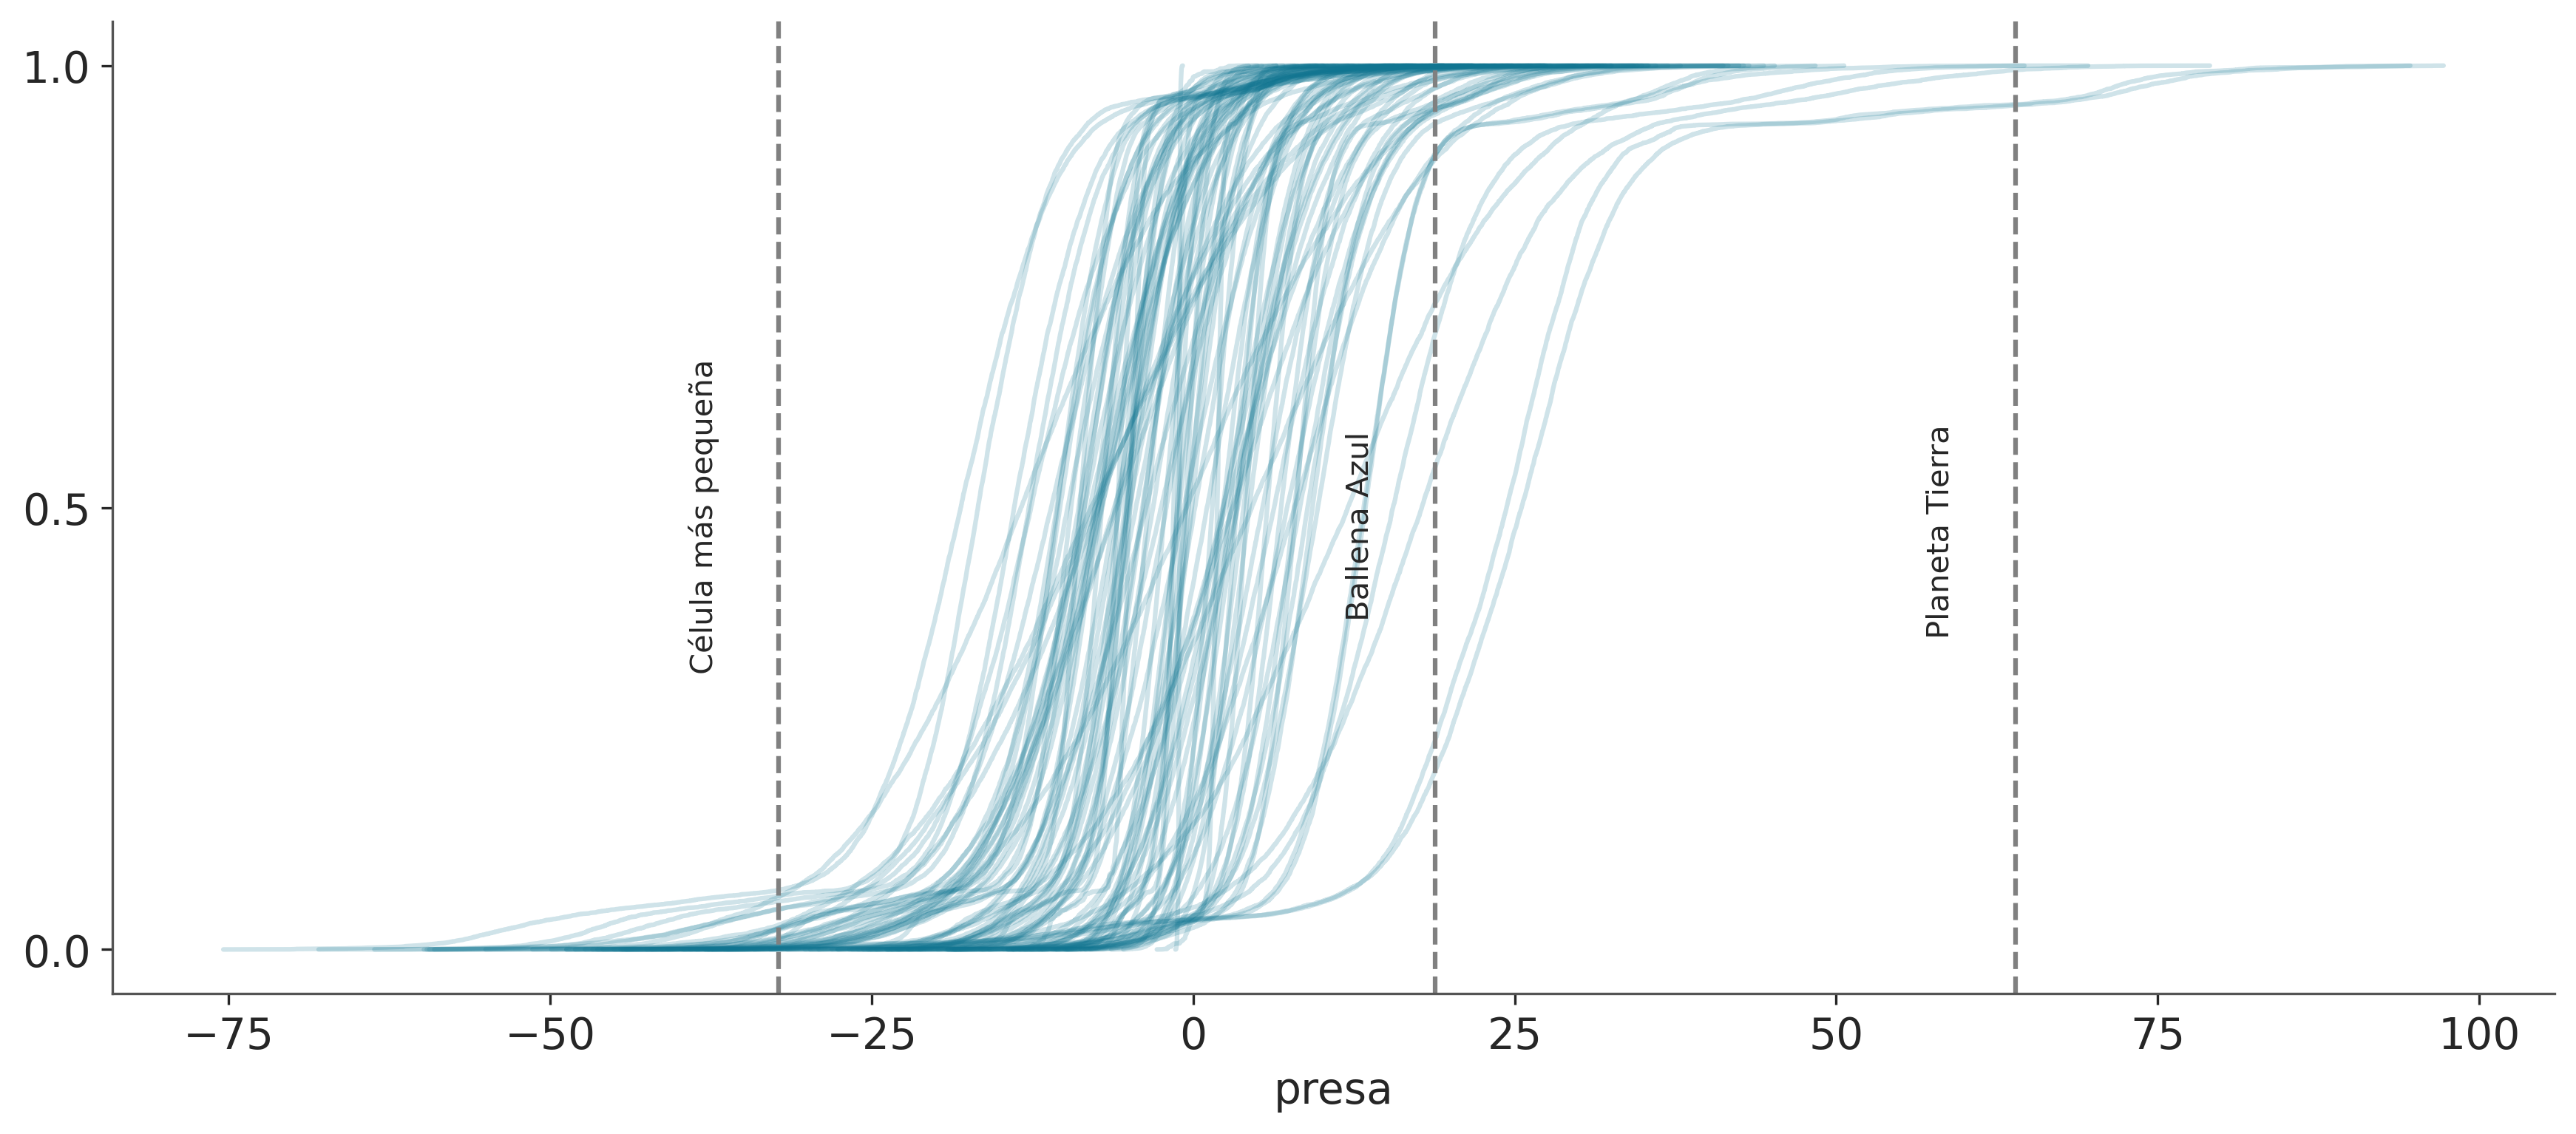

In [12]:
ax = az.plot_ppc(idata, group="prior", kind="cumulative", mean=False, legend=False)

for key, val in refs.items():
    ax.axvline(val, ls="--", color="0.5")
    ax.text(val-7, 0.5-(len(key)/100), key, rotation=90)

##  Cuán informativos deben ser los priors? 

<br>

* El uso de priors vagos/planos/no-informativos no es aconsejable
    * Codifican supuestos poco o nada realistas
    * Pueden hacer el muestreo menos eficiente
    * Usualmente algo de información tenemos

<br>

* Los priors informativos pueden ser muy útiles, 
    * Hay que ser cuidadosos de no introducir sesgos no-intencionales
    * Usualmente requieren de conocimiento experto
    * El costo en tiempo/esfuerzo/dinero de implementarlo puede ser muy alto

<center>
<img src="img/priors_int_meme.jpg" width=400>
</center>

## Goldilocks principle

<br>

* En la práctica la opción más útil suele encontrarse en algún punto entre los priors muy vagos y los muy informativos

* Se los suele llamar "debilmente informativos" o "weakly informative priors"

* No hay una definición matemática precisa

<center>
<img src="img/wip.png" width=900>
</center>

## Más una práctica que un método

<br>

* Establecer la escala: determinar el orden de magnitud correcto. 

* Mantener el modelo realista: el rango plausible que puede tomar un parámetro.

* Evitar lo imposible: evitar valores sin sentido o no físicos. 

##  Prior Predictive Elicitation 

<br>

* La idea de ajustar los priors utilizando como base la distribución predictiva a priori

* Incluye métodos automáticos y completamente *ad-hoc*

* Un área de investigación y aplicación sub-desarrolada

* Uno de los objetivos de PreliZ

In [13]:
def pp_model(α_μ=0, α_σ=10, β_μ=0, β_σ=10, σ_σ=5):
    α = pz.Normal(α_μ, α_σ).rvs()
    β = pz.Normal(β_μ, β_σ).rvs()
    σ = pz.HalfNormal(σ_σ).rvs()
    prey = pz.Normal(α + β * pp_mass.predator_log, σ).rvs()
    return prey

refs = {"Earth":np.log(5.97e+27), "Blue whale":np.log(1.5e8), "Smallest cell":np.log(1e-14)}
pz.predictive_explorer(pp_model, references=refs)

```python
def a_pymc_model(α_μ=0, α_σ=100, β_μ=0, β_σ=100, σ_σ=5):
    with pm.Model() as model:
        α = pm.Normal("α", α_μ, α_σ)
        β = pm.Normal("β", β_μ, β_σ)
        σ = pm.HalfNormal("σ", σ_σ)
        presa = pm.Normal("presa", α + β * pp_mass["prey_log"], σ, observed=pp_mass["predator_log"])
    return model

refs = {"Earth":np.log(5.97e+27), "Blue whale":np.log(1.5e8), "Smallest cell":np.log(1e-14)}
pz.predictive_explorer(a_pymc_model, references=refs)
``` 

## Pruebas predictivas a posteriori

La distribución predictiva a posteriori

$$
p(\tilde{y}  \mid  y) = \int p(\tilde{y} \mid \theta) p(\theta \mid y) d\theta 
$$




> Una prueba predictiva a posteriori consiste en comparar $p(\tilde{y})$ con $y$. 


In [14]:
accidentes = pd.Series([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                       3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                       2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                       1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                       0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                       3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])
años = np.arange(1851, 1962)

In [15]:
with pm.Model() as modelo_cat:
    pc = pm.DiscreteUniform("pc", lower=años.min(), upper=años.max())

    t_0 = pm.Exponential("t_0", 1)
    t_1 = pm.Exponential("t_1", 1)

    tasa = pm.Deterministic("tasa", pm.math.switch(pc >= años, t_0, t_1))

    acc = pm.Poisson("acc", tasa, observed=accidentes)
    idata_cat = pm.sample(1000, random_seed=1791, progressbar=False)
    idata_cat.extend(pm.sample_posterior_predictive(idata_cat, progressbar=False))

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [pc]
>NUTS: [t_0, t_1]
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
Sampling: [acc]


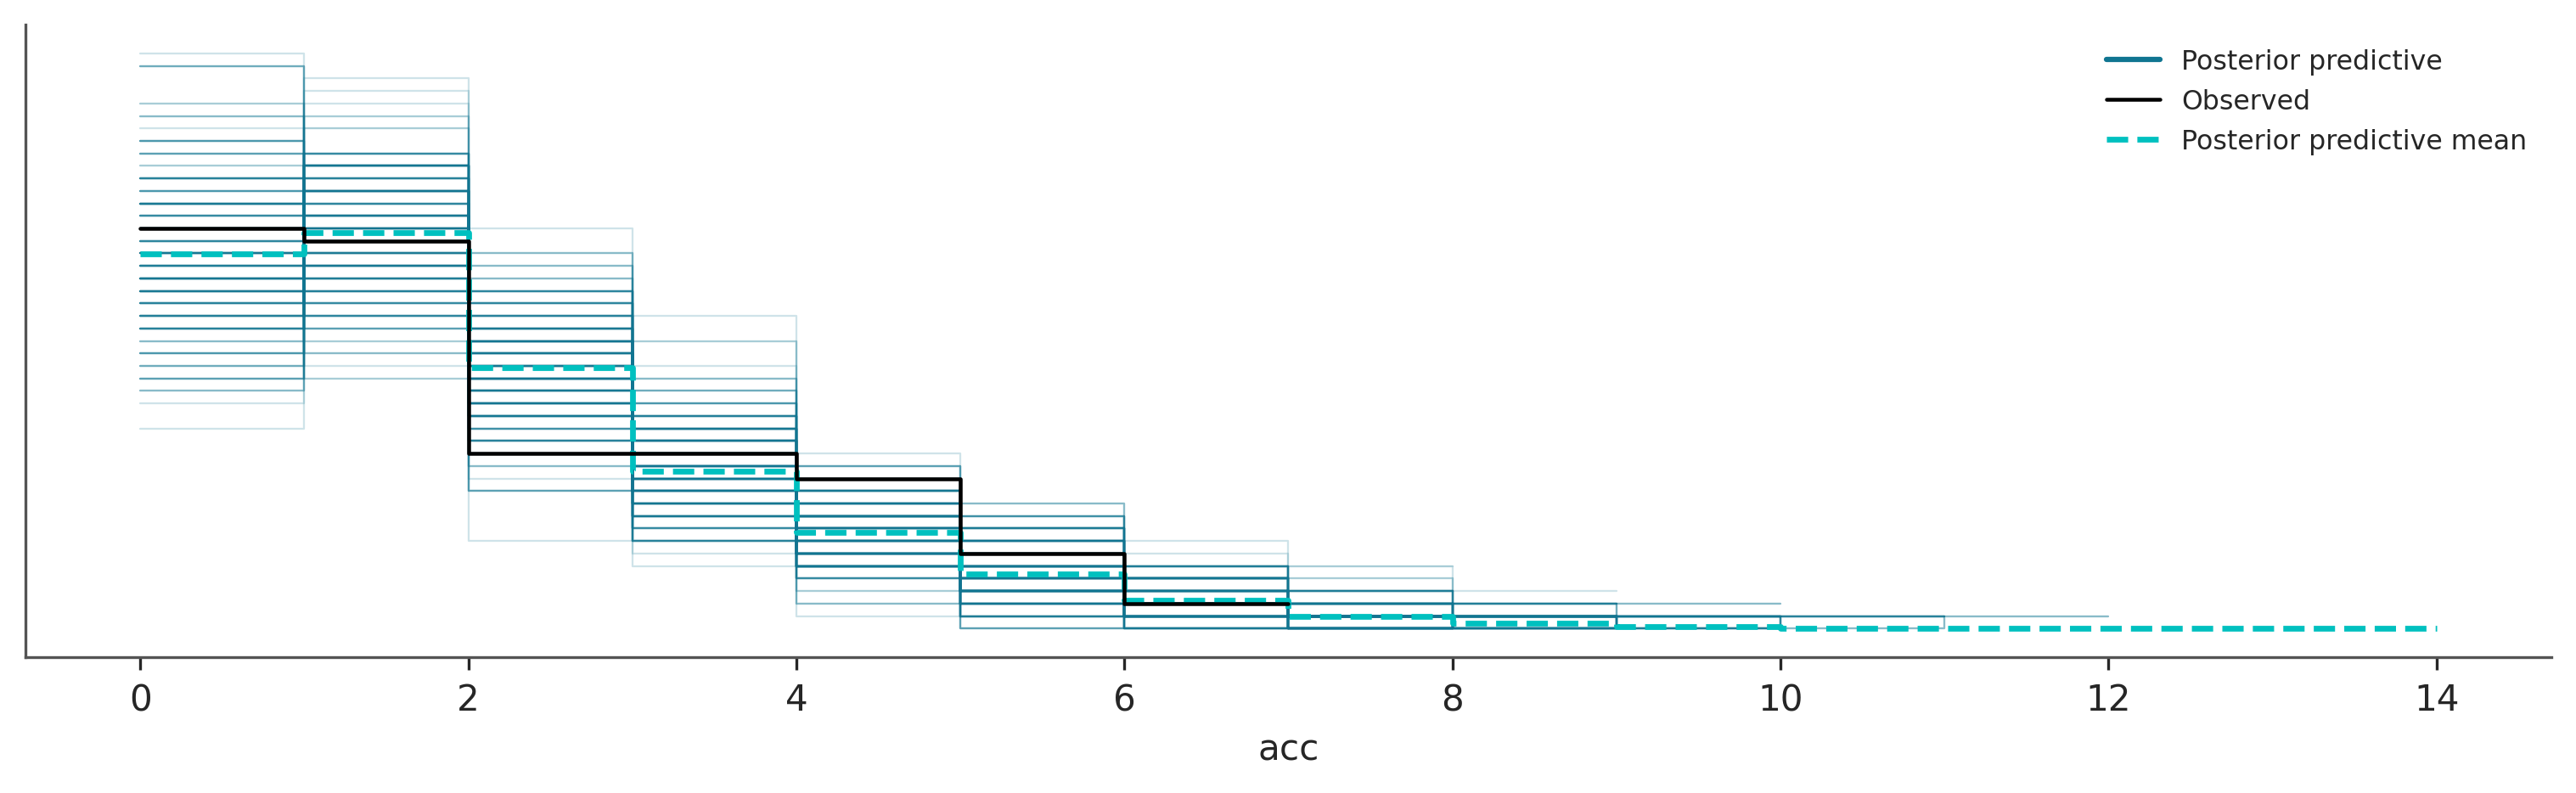

In [16]:
ax = az.plot_ppc(idata_cat, figsize=(10, 3), num_pp_samples=200)
ax.set_xlabel("acc");

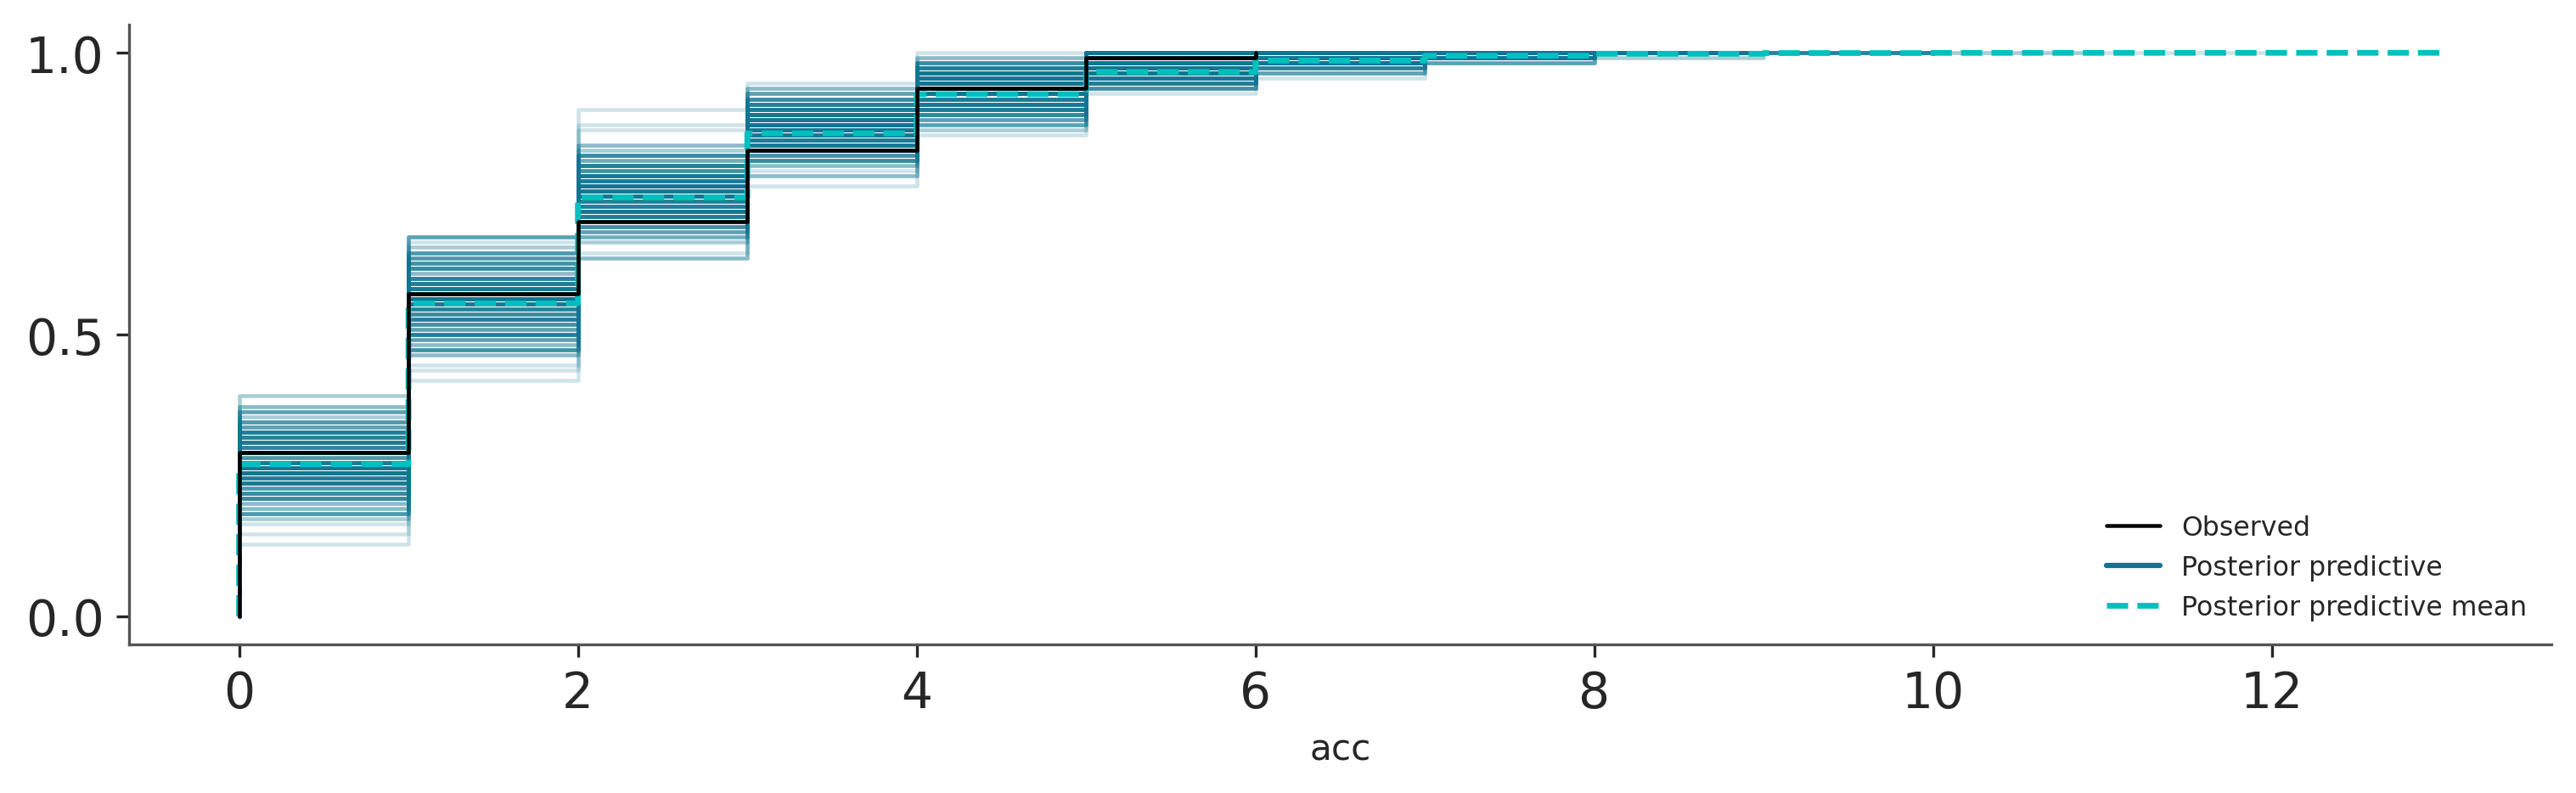

In [17]:
ax = az.plot_ppc(idata_cat, figsize=(10, 3), kind="cumulative", num_pp_samples=200)
ax.set_xlabel("acc");


### Valores p Bayesianos

<br>
Un valor-p Bayesiano se define como:
<br>

$$
\text{valor-p Bayesiano} \triangleq p(T_{\text{sim}} \le T_{\text{obs}} \mid \tilde y)
$$


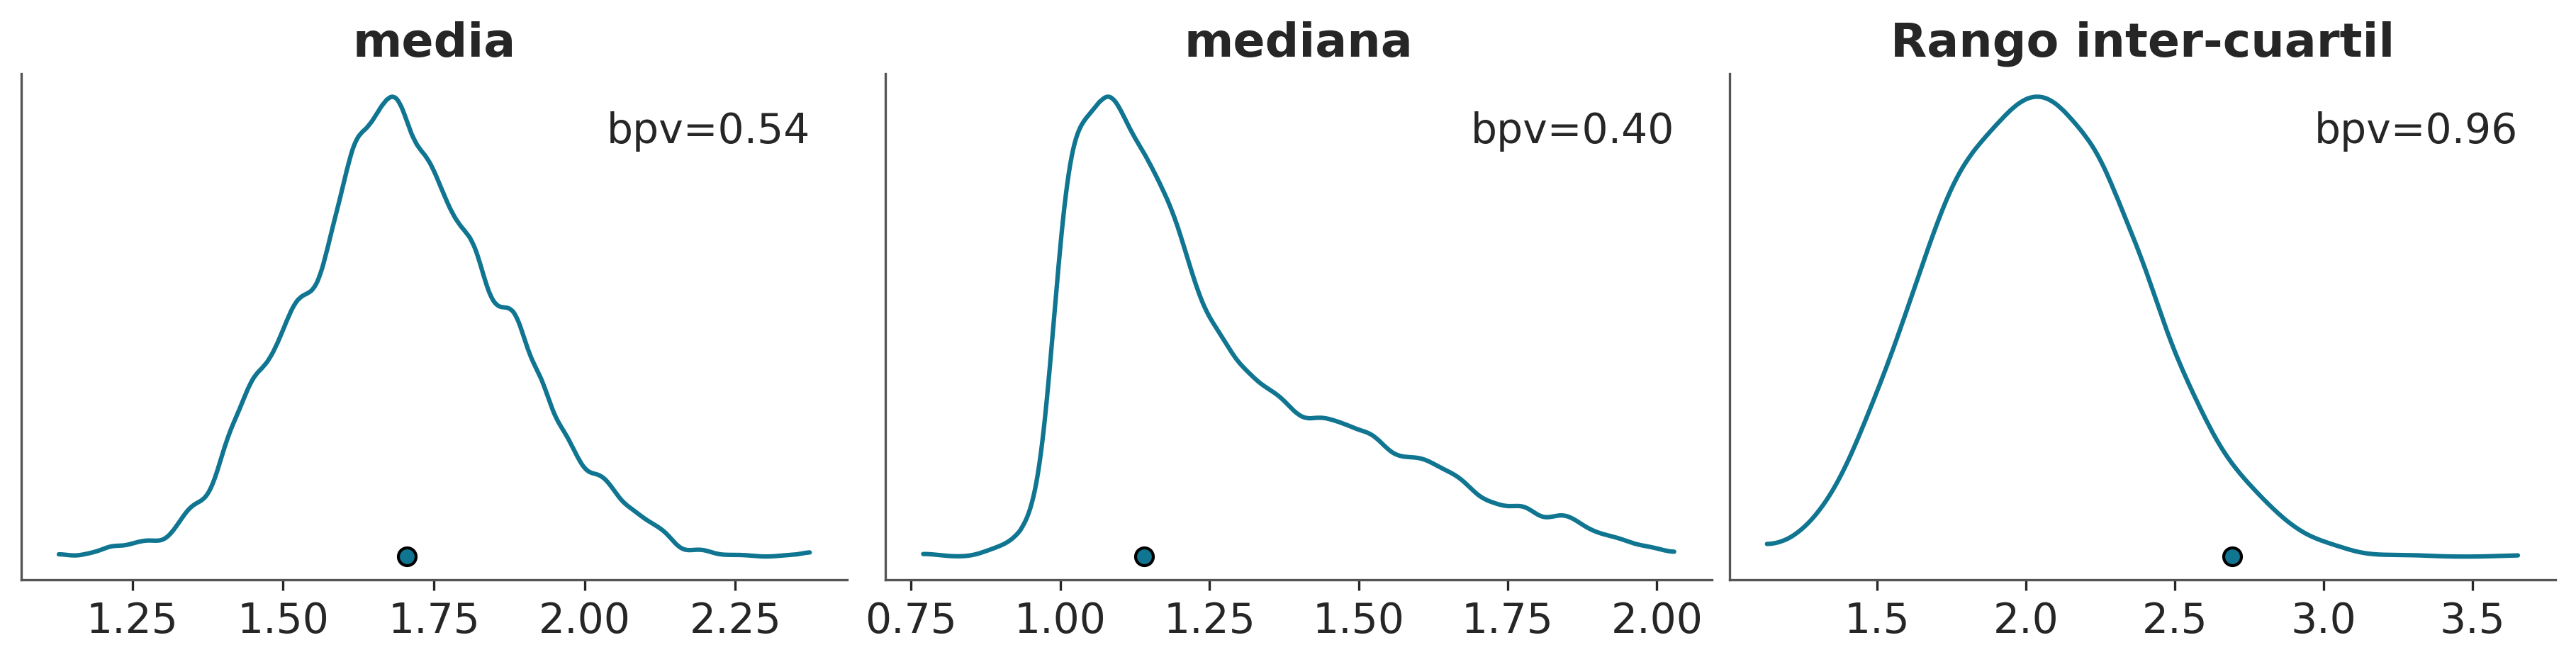

In [18]:
_, ax = plt.subplots(1, 3, figsize=(12, 3))

def iqr(x, a=-1):
    """interquartile range"""
    return np.subtract(*np.percentile(x, [75, 25], axis=a))

az.plot_bpv(idata_cat, kind="t_stat", t_stat="mean", ax=ax[0])
az.plot_bpv(idata_cat, kind="t_stat", t_stat="median", ax=ax[1])
az.plot_bpv(idata_cat, kind="t_stat", t_stat=iqr, ax=ax[2])
ax[0].set_title("media")
ax[1].set_title("mediana")
ax[2].set_title("Rango inter-cuartil");

Un caso especial se da al comparar si los valores simulados son menores que los observados, es decir

$$
p(\tilde y \le y_{\text{obs}} \mid y)
$$

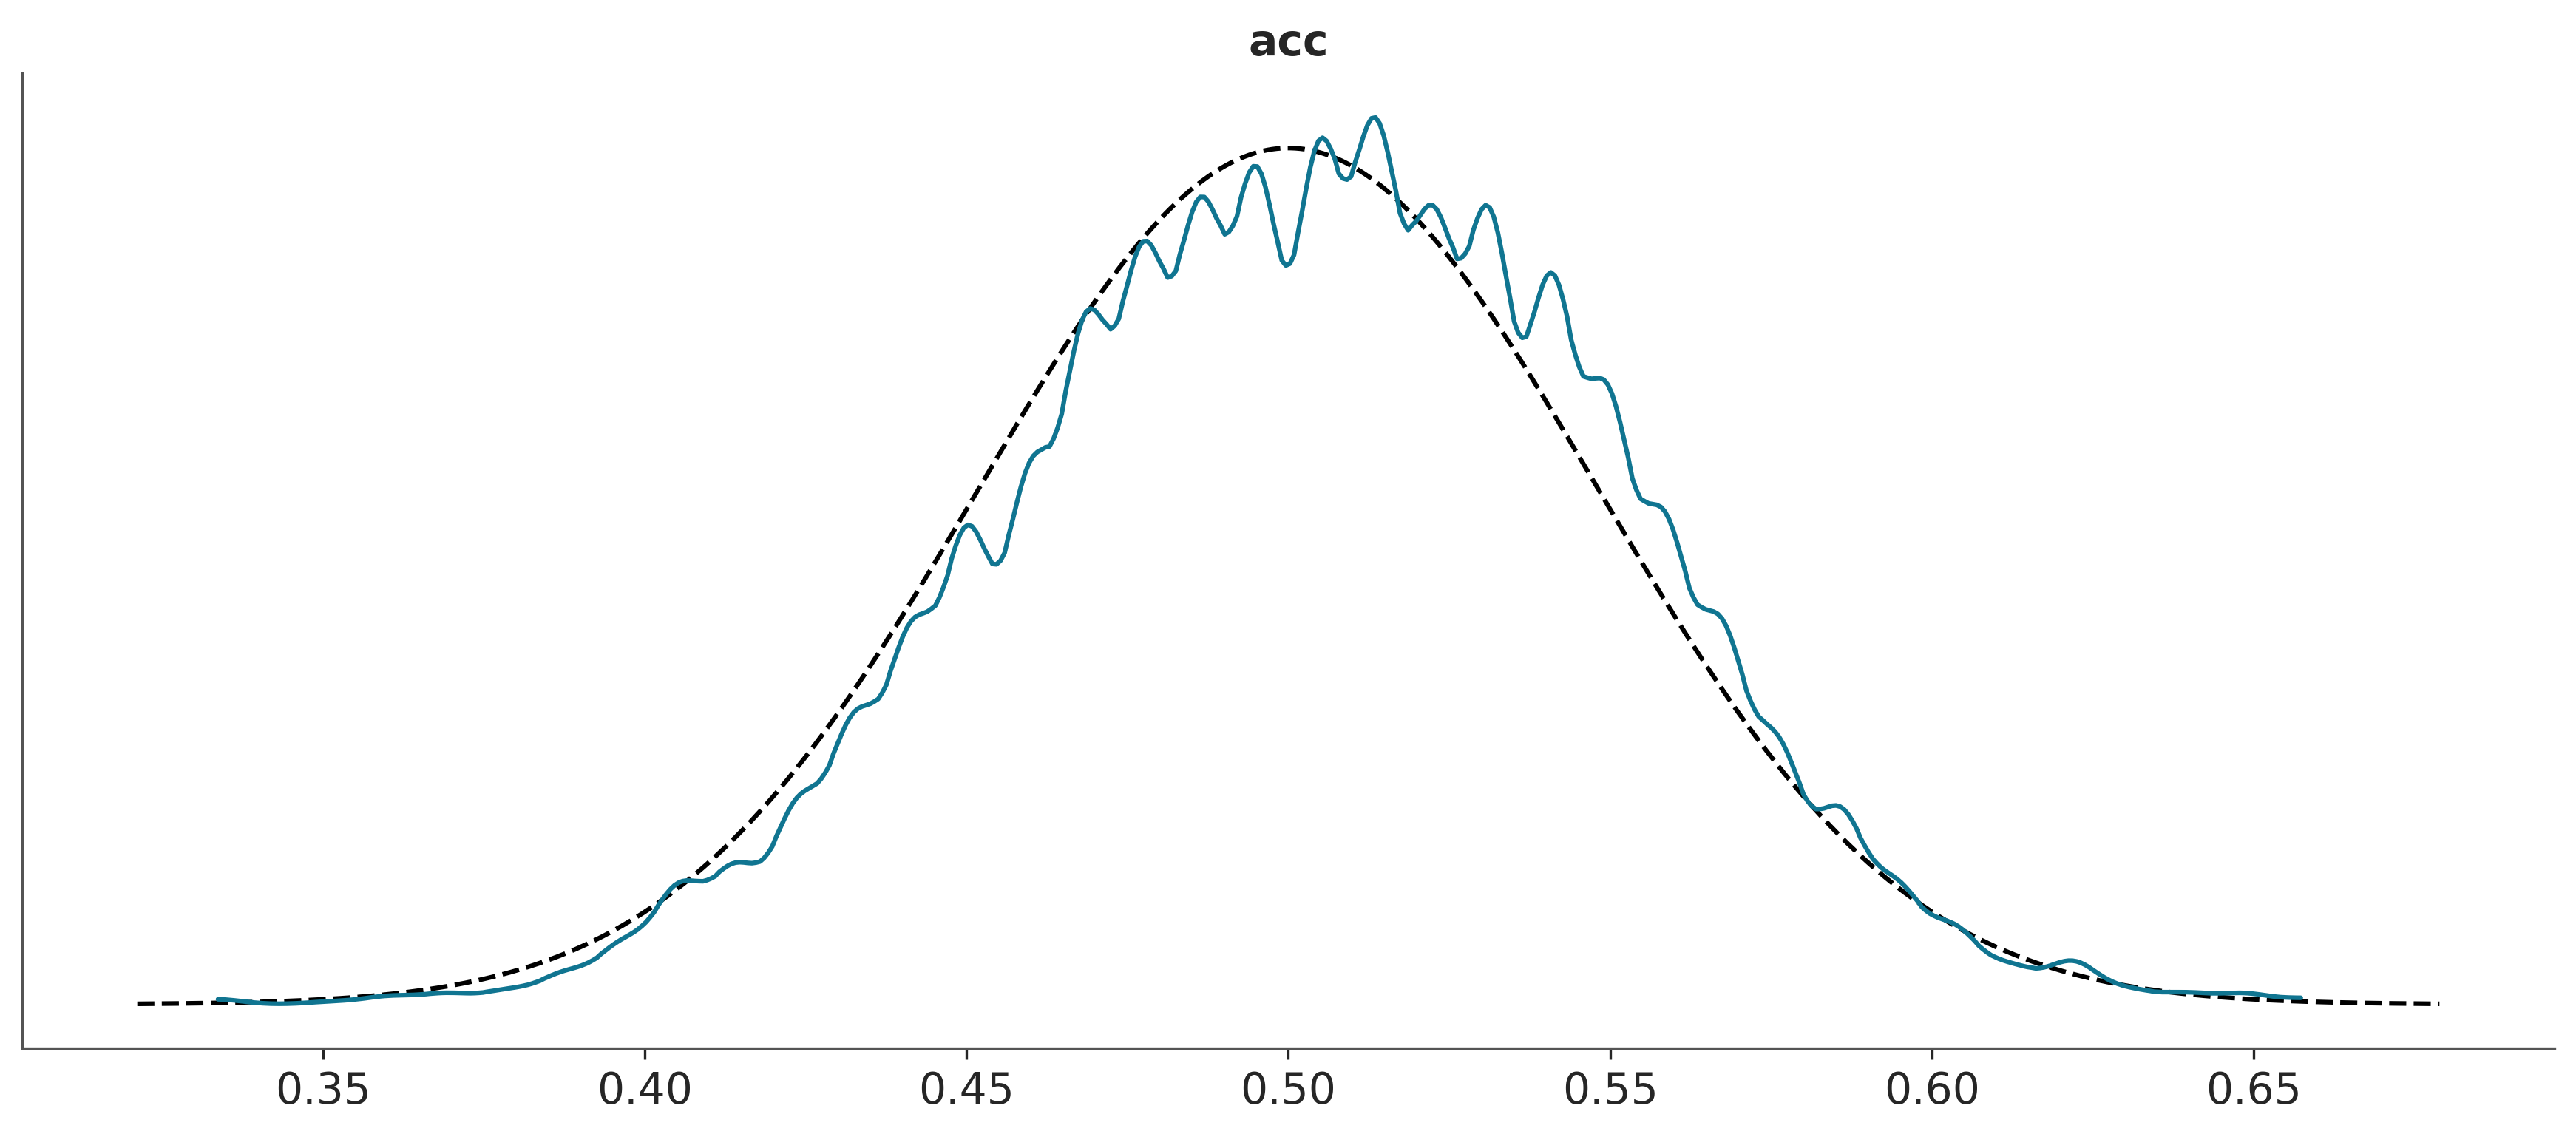

In [19]:
az.plot_bpv(idata_cat, kind="p_value");

Otra posibilidad es realizar la comparación por observación.

$$
p(\tilde y_i \le y_i \mid y)
$$

Esto se suele llamar valor-p marginal y la distribución ideal es uniforme estándar.

La linea blanca en la siguiente figura representa el valor ideal y la banda gris la desviación esperada dado el tamaño de los datos. Los valores de x se pueden interpretar como cuantiles, es decir los valores centrales representan el "seno" de la distribución y los valores extremos las "colas".

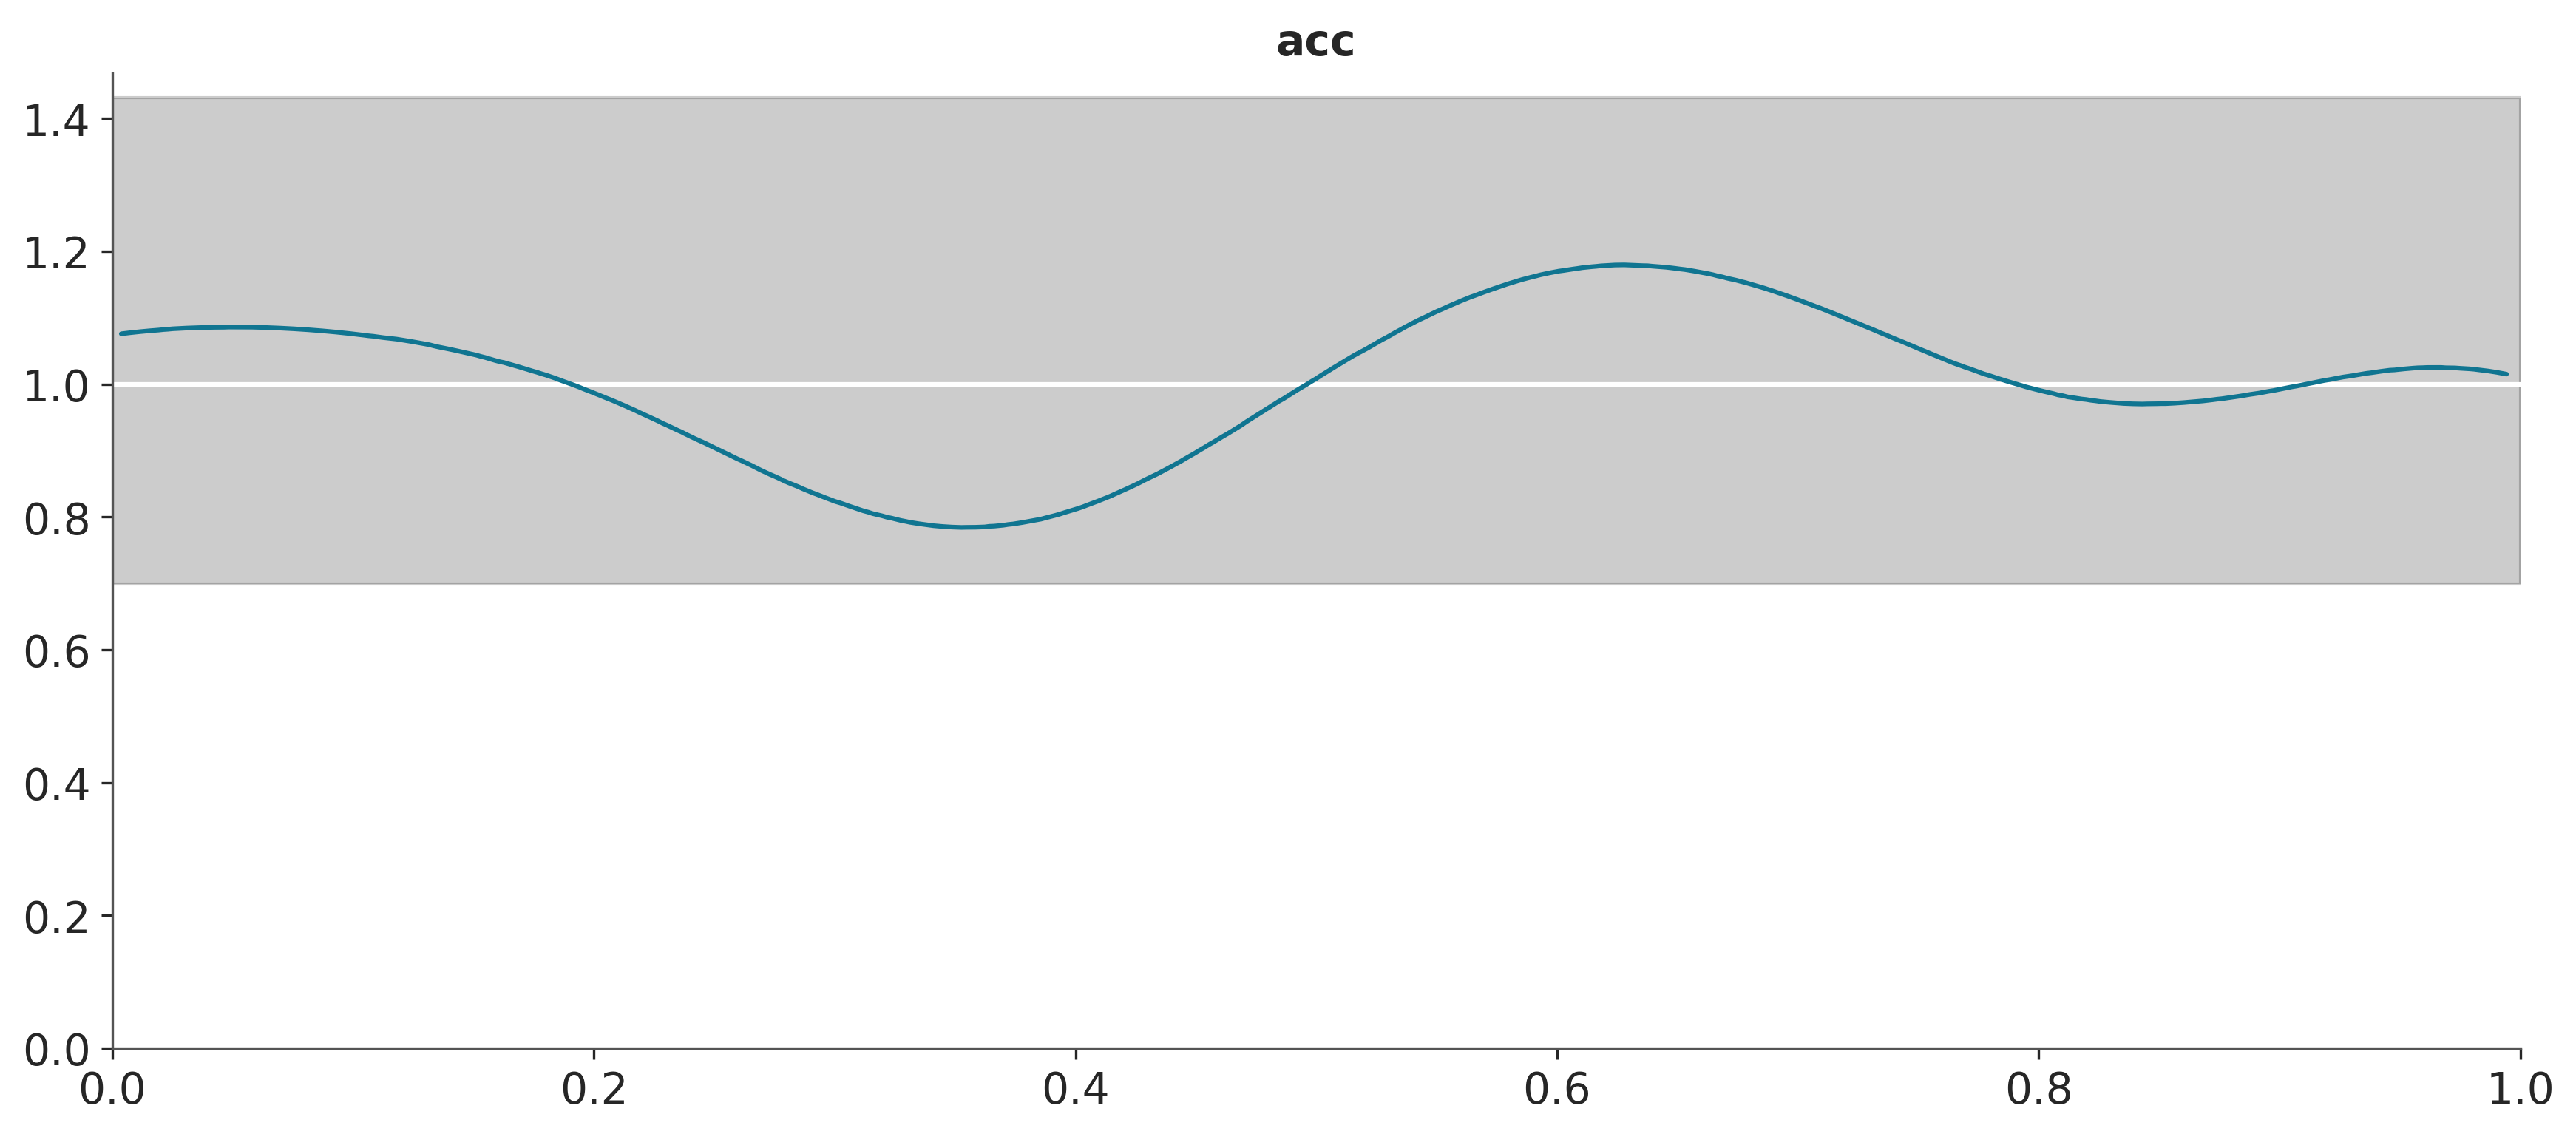

In [20]:
az.plot_bpv(idata_cat);

Por qué esperamos una distribución uniforme? Debido a una propiedad llamada transformada integral de probabilidad (PIT por su sigla en inglés). También llamada a veces universalidad de la uniforme.

Dada una variable aleatoria continua $X$ y CDF $F_X$ podemos computar una variable aleatoria $Y$ con distribución uniforme estándar haciendo.

$$
Y = F_X (X)
$$

Es decir si tomamos una variable aleatoria $X$ y le aplicamos su propia CDF, la transformamos en $Y \sim \mathcal{U}[0, 1]$. Empíricamente podemos ver esto haciendo

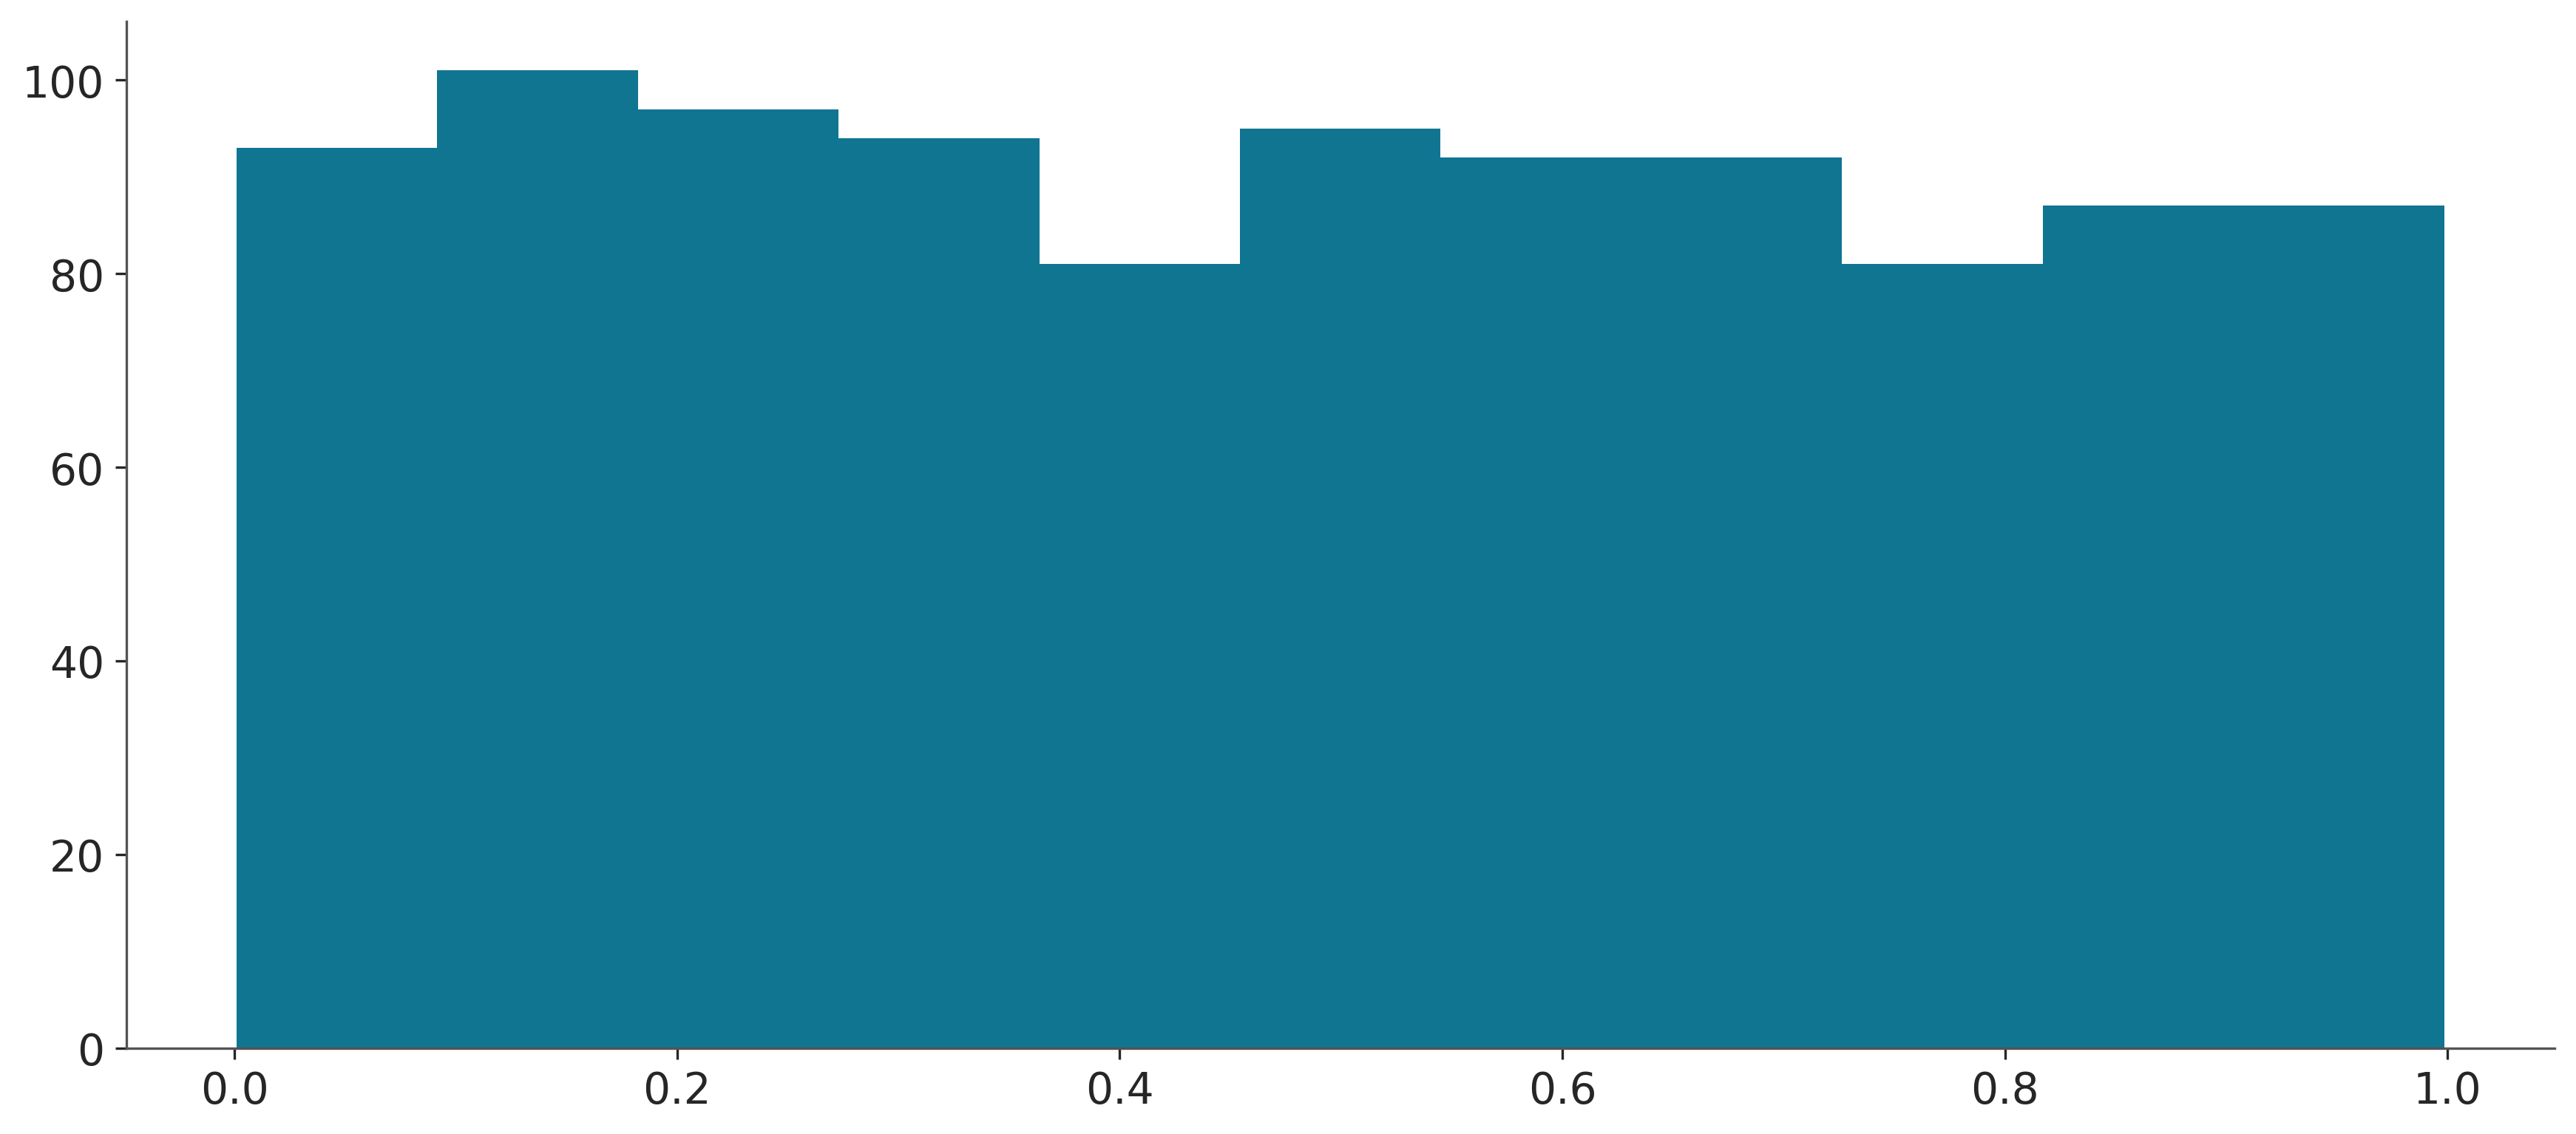

In [21]:
dist = pz.Normal(0, 1)  # Probar con otras distribuciones
plt.hist(dist.cdf(dist.rvs(1000)), bins="auto");

Si desconocemos $F_X$, pero contamos con muestras de $X$, podemos usar la CDF empírica que es lo que estamos haciendo al calcular el valor-p marginal.

In [22]:
dist = pz.Normal(0, 1)  # Probar con otras distribuciones
pred_f = np.exp(dist.rvs(1000))**0.3
obs_f = np.exp(dist.rvs(1000))**0.3

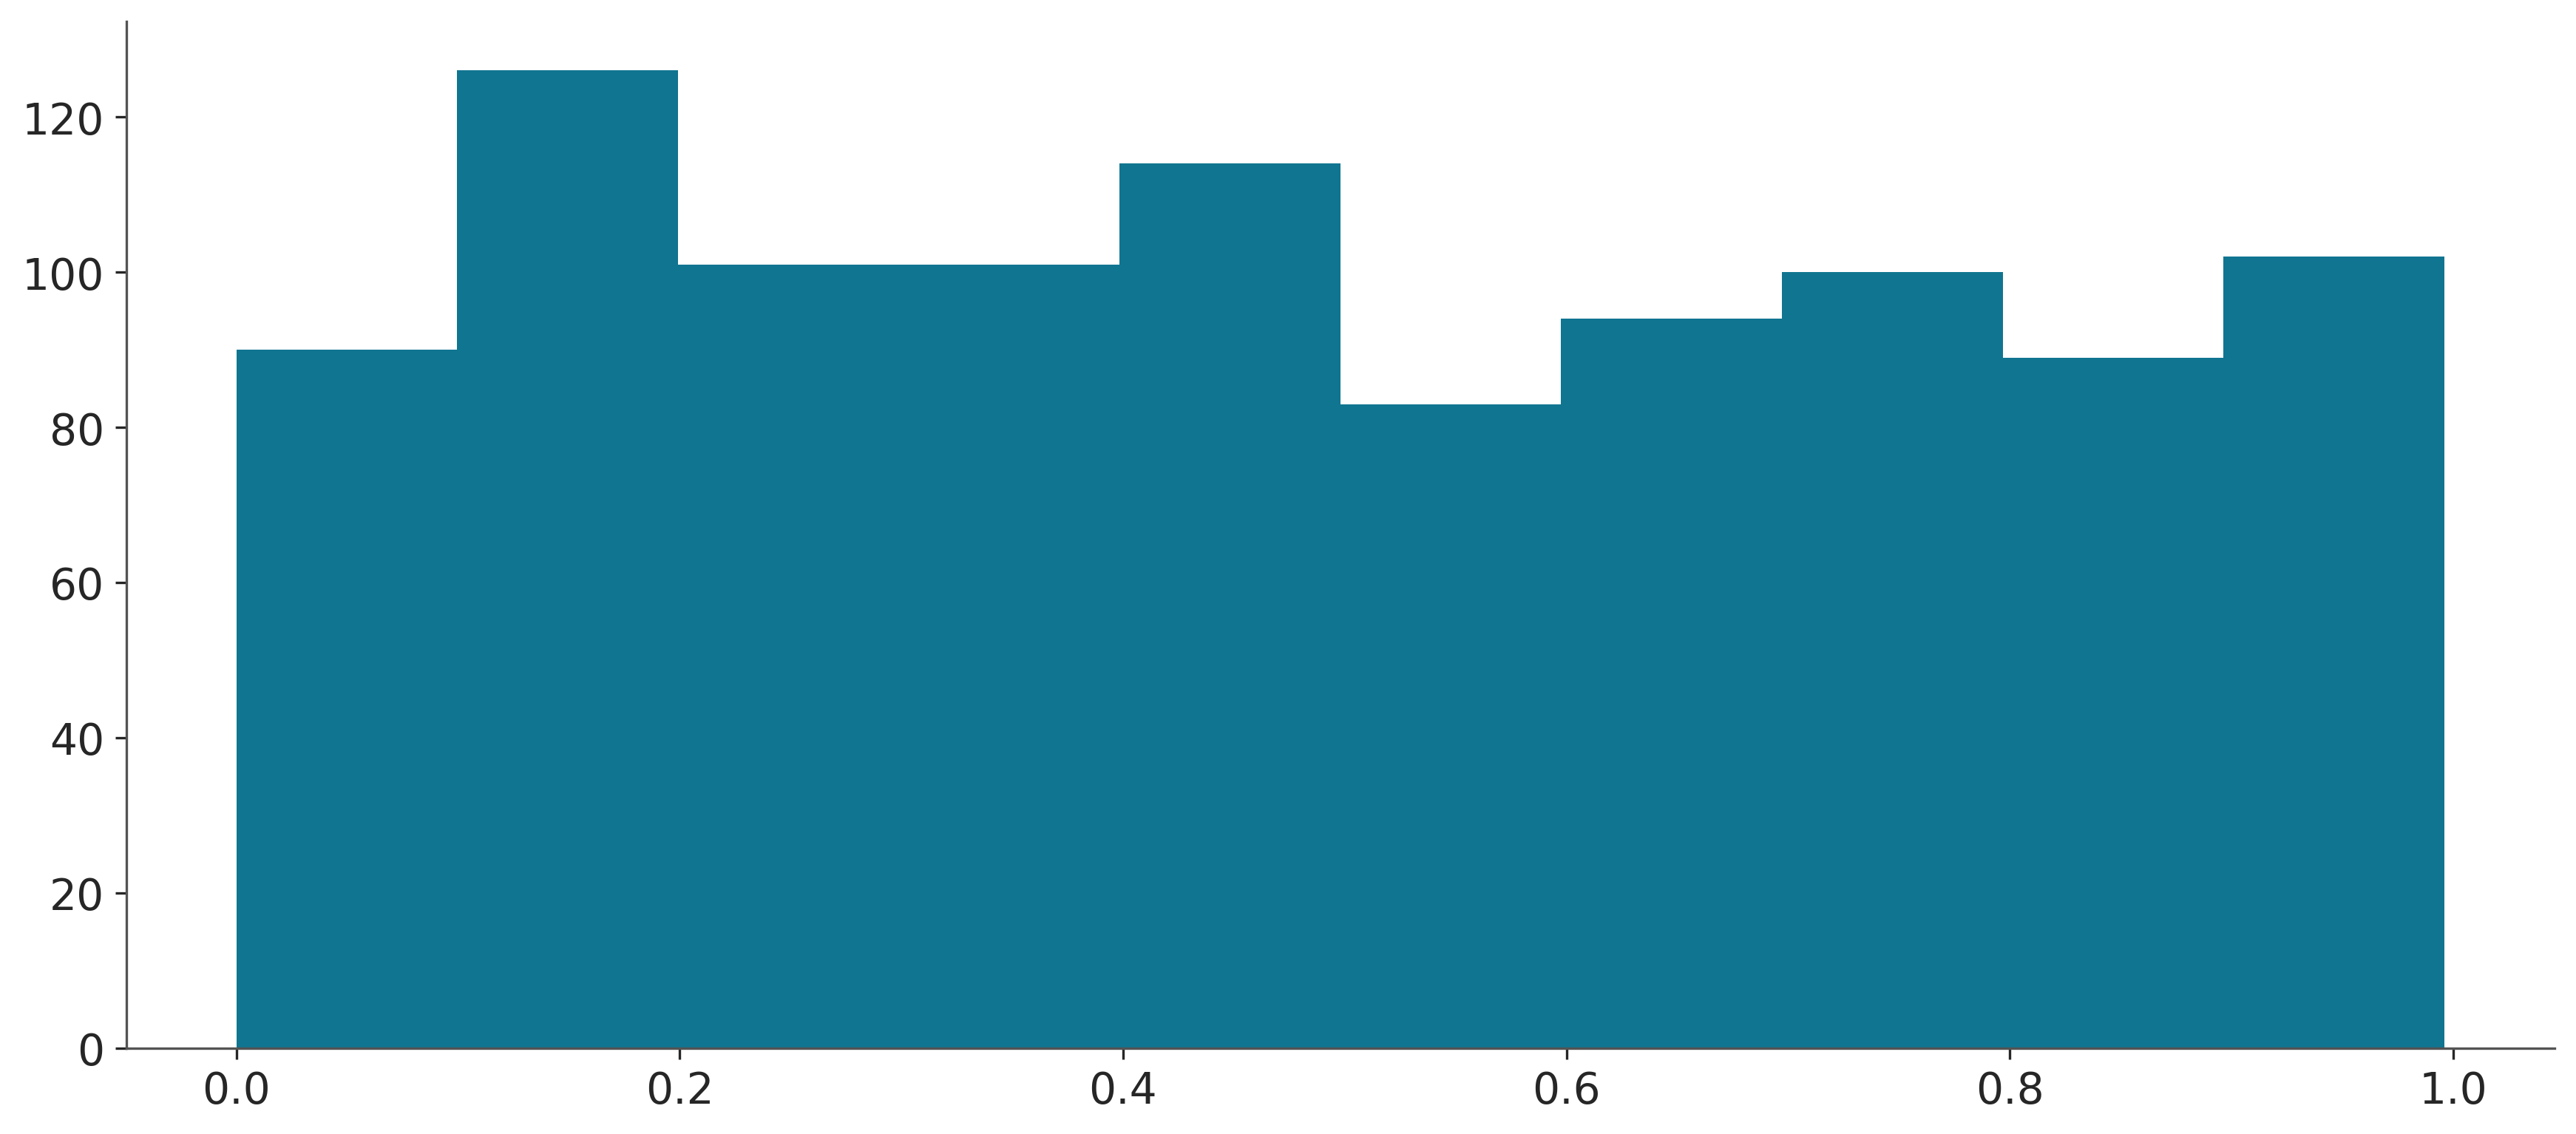

In [23]:
pit = []
for m in obs_f:
    pit.append(np.mean(pred_f <= m))
    
plt.hist(pit);

## Comparación de modelos

* Navaja de Occam. Dadas dos o más explicaciones equivalentes para el mismo fenómeno, la más simple es la explicación preferida. Un criterio común de simplicidad es la cantidad de parámetros de un modelo.

* La capacidad de un modelo de ajustar observaciones

* La capacidad de un modelo de generar buenas predicciones

In [ ]:
#| code-fold: true

_, ax = plt.subplots(1, 1, figsize=(12, 4))


x0 = np.array([4., 5., 6., 9., 12, 14.])
y0 = np.array([4.2, 6.1, 5., 10., 10, 14.])

order = [0, 1, 5]
ax.plot(x0, y0, 'ko', zorder=3)


ax.set_yticks([])
ax.set_xticks([])

x_n = np.linspace(x0.min(), x0.max(), 100)
ps = []
for i in order:
    p = np.polynomial.Polynomial.fit(x0, y0, deg=i)
    ps.append(p)
    yhat = p(x0)
    ybar = np.mean(y0)
    ss_regression = np.sum((yhat-y0)**2)
    ss_total = np.sum((ybar-y0)**2)
    r2 = 1 - ss_regression / ss_total
    ax.plot(x_n, p(x_n), label=f'orden {i}, $R^2$= {r2:.3f}')

    
ax.legend(loc=2);

In [ ]:
#| code-fold: true

_, ax = plt.subplots( figsize=(12, 4))
x_ = np.array([6.5, 10])
y_ = np.array([7, 10])

ax.plot(x0, y0, 'ko', zorder=3)
ax.plot(x_, y_, 'ks', zorder=3)

ax.set_yticks([])
ax.set_xticks([])

x1 = np.concatenate((x0, x_))
y1 = np.concatenate((y0, y_))

for idx, i in enumerate(order):
    yhat = ps[idx](x1)
    ybar = np.mean(y1)
    ss_regression = np.sum((yhat-y1)**2)
    ss_total = np.sum((ybar-y1)**2)
    r2 = 1 - ss_regression / ss_total
    ax.plot(x_n, ps[idx](x_n), label=f'orden {i}, $R^2$= {r2:.3f}')

    
ax.legend(loc=2);

### Medidas de exactitud predictiva



* **Exactitud dentro de la muestra** (within-sample accuracy). La exactitud medida con los mismos datos usado para ajustar el modelo.
* **Exactitud fuera de la muestra** (out-of-sample accuracy). La exactitud medida con datos no usados para ajustar el modelo.


> La exactitud dentro de la muestra será, en promedio, mayor a la exactitud fuera de la muestra.

## Aproximando la exactitud fuera de la muestra

* Validación cruzada

* Criterios de información

### Validación cruzada

<br>

<img src='../img/cv.png' width=500 >


### Criterios de información

> Una familia de métodos que permiten comparar modelos, mediante la combinación de un término que evalua el ajuste a los datos y otro que penaliza modelos complejos.


### Entropia

Para una distribución de probabilidad con $N$ posibles eventos diferentes, donde cada evento posible tiene una probabilidad $p_i$, la entropía se define como:

$$
H(p) = - \mathbb{E}[\log{p}] = -\sum_i^N p_i \log{p_i}
$$

* La entropía es una medida de la incertidumbre de una distribución.
* Si solo un evento es posible la entropía será 0, si todos los eventos tienen la misma probabilidad la entropía será máxima.

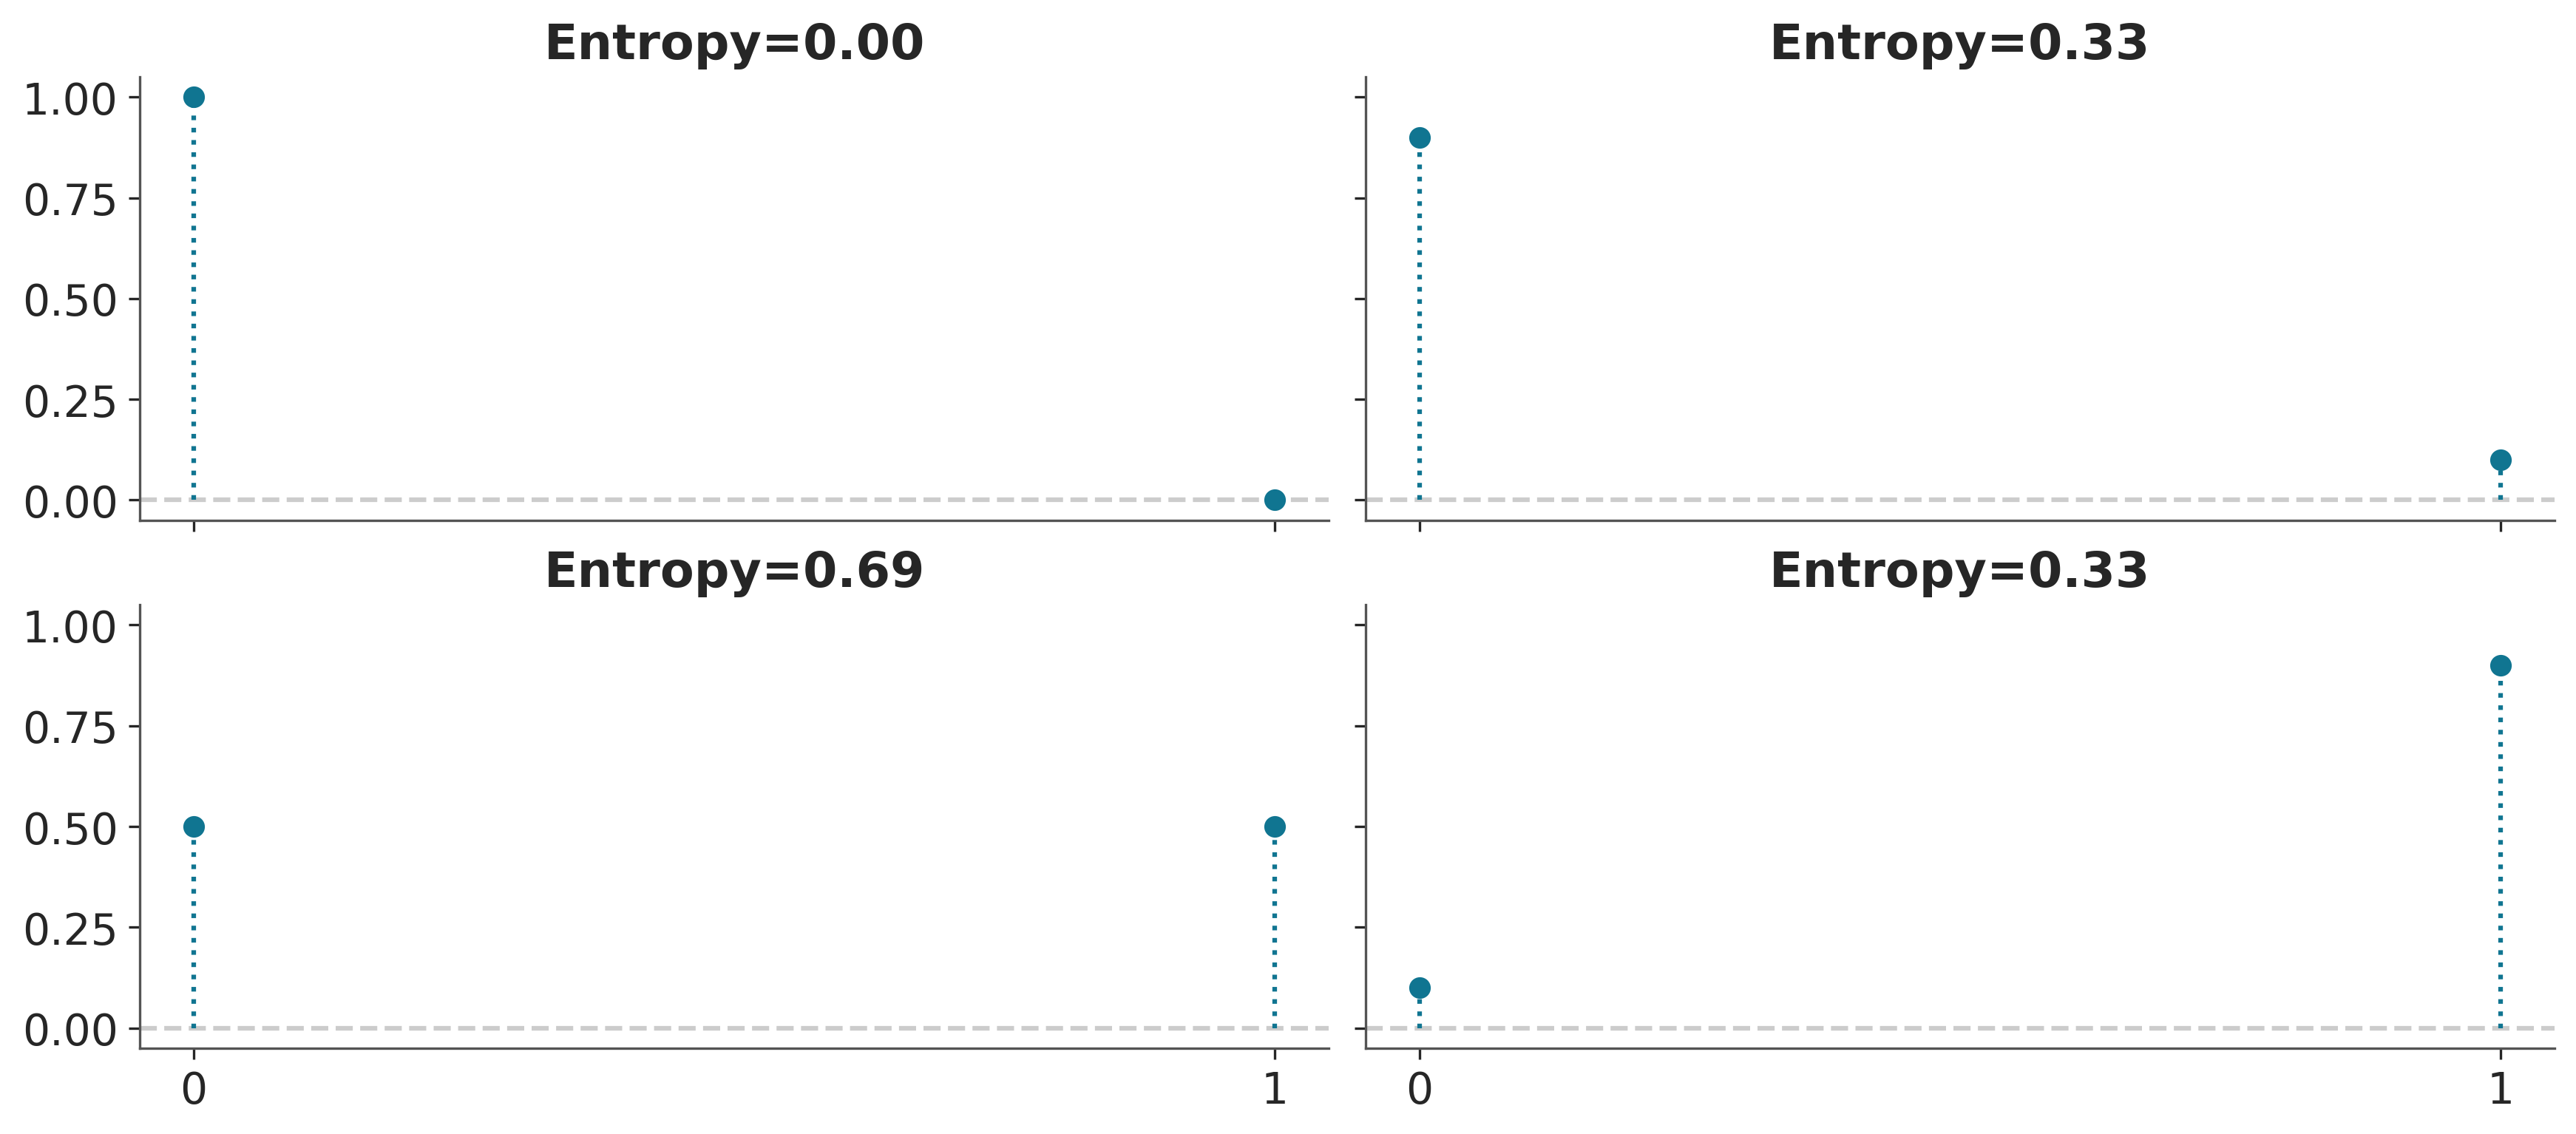

In [27]:
_, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for p, ax in zip([0.0001, 0.1, 0.5, 0.9], axes.ravel()):
    dist = pz.Bernoulli(p=p)
    dist.plot_pdf(ax=ax, legend=False)
    ax.set_title(f"Entropy={dist.entropy():.2f}")
    ax.set_ylim(-0.05, 1.05)

### Entropía en estadística

* Principio de máxima entropía: Dado un conjunto de restricciones se elije la distribución con mayor entropía. Útil para justificar priors (pero también likelihoods!)

* La divergencia de Kullback-Leibler: Calcular cuan similares son dos distribuciones

## Divergencia de Kulback-Leibler

* Supongamos que tenemos una distribución objetivo $q$, con la cual no podemos/queremos trabajar de forma directa
* En vez de usar $q$ decidimos usar $p$
* Queremos encontrar $p$ de forma que mejor aproxime a $q$, entonces:

$$
p = \arg\min_{p \in P} D_{\text{KL}}(q \| p)
$$

## Divergencia de Kulback-Leibler

$$
\mathbb{KL}(q \parallel p) =  \overbrace{-\sum_i^N q_i \log{p_i}}^{H(q, p)} -  \overbrace{\left(-\sum_{i}^N q_i \log{q_i}\right)}^{H(q)}
$$

* $H(q)$ es la entropía de $q$
* $H(q, p)$ es la *entropía cruzada*, es la entropía de $p$ pero evaluada según $q$ 

> Según esta expresión la divergencia de KL representa la entropía "extra" que introducimos al aproximar $q$ por $p$. 


## Divergencia de Kulback-Leibler

Se la suele encontrar escrita de varias formas:

$$
\mathbb{KL}(q \parallel p) \quad=\quad- \sum_i^N q_i (\log{p_i} - \log{q_i}) \quad=\quad \mathbb{E}_q[\log{q}] - \mathbb{E}_q[\log{p}] \quad=\quad \sum_i^N q_i \log{\frac{q_i}{p_i}}
$$

## Todo bien, pero y si no se quien es $q$?

* Si $q$ representa el **proceso generador de datos** o la **población** o la distribución **verdadera** y $p_i$ nuestros modelos entonces podemos hacer:

$$
\begin{split}
        \mathbb{KL}(q \parallel p_0) =&\; \mathbb{E}[\log{q}] - \mathbb{E}[\log{p(Y \mid \theta_0)}] \\
        \mathbb{KL}(q \parallel p_1) =&\; \mathbb{E}[\log{q}] - \mathbb{E}[\log{p(Y \mid \theta_1)}] \\
        &\cdots \\
        \mathbb{KL}(q \parallel p_m) =&\; \mathbb{E}[\log{q}] - \mathbb{E}[\log{p(Y \mid \theta_m)}]
\end{split}
$$

Si comparamos modelos entonces el mejor modelo, será el que maximize el segundo término.

En la práctica muchas vecemos tampoco tenemos acceso a $\mathbb{E}[\log{p}]$, pero tenemos muestras!

### Criterio de información de Akaike 

$$
AIC = -2 \sum_i^N \log p(y_i \mid \hat{\theta}_{mle}) + 2 k
$$

Donde, $k$ es el número de parámetros del modelo y $\hat{\theta}_{mle}$ es la estimación por máxima verosimilitud para $\theta$. 


Si omitimos la constante -2:


$$
AIC = \sum_i^N \log p(y_i \mid \hat{\theta}_{mle}) - k
$$


### Criterio de información de Akaike 

* El criterio de AIC es muy útil, pero presenta problemas para modelos Bayesianos. 

* Una de las razones es que no utiliza la distribución a posteriori de $\theta$ y, por lo tanto, descarta información. 

* Desde una perspectiva Bayesiana, AIC asume que los priors son *planos*

* $k$ No es una buena estimación de la complejidad de un modelo cuando se usan priors informativos o estructuras como la jerárquica.

## En busca de la versión Bayesiana de AIC

$$
\sum_i^N \log p(y_i \mid \hat{\theta}_{mle})
$$

Pero en estadística Bayesiana, NO tenemos una estimación puntual de $\theta$. Tenemos una distribución, por lo que deberíamos hacer:

$$
\sum_i^N \log
    \int \ p(y_i \mid \theta) \; p(\theta \mid y) d\theta
$$

Como en general no tenemos una expresión analítica para el posterior, $p(\theta \mid y)$, pero tenemos unas serie de muestras:
    
$$
\sum_i^N \log \left(\frac{1}{S} \sum_{j}^S p(y_i \mid \theta^j) \right)
$$

LLamaremos a esta cantidad ELPD (Expected log-pointwise density)

### Widely Applicable Information Criteria (WAIC)

$$
WAIC = \sum_i^N \log \left(\frac{1}{S} \sum_{j}^S p(y_i \mid \theta^j) \right) - \sum_i^N  \left( V_{j}^S \log p(y_i \mid \theta^j) \right)
$$


* La penalización viene dada por la varianza de los log-likelihoods sobre las $S$ muestras del posterior. 

* Intuitivamente el término penaliza modelos que tengan mucha variabilidad en sus predicciones.

$$
Y = \alpha + \beta X
$$

Un modelo donde $\beta=0$ será menos flexible, ya que equivale a un modelo que solo tiene un parámetro, $\alpha$. De forma un poco más sutil un modelo donde $\beta$ varía en un rango estrecho será menos flexible (más regularizado), que un modelo donde $\beta$ puede tomar cualquier valor.

### LOO y la validación cruzada (aproximada)


Existe otra alternativa para penalizar el término

$$
\sum_i^N \log \left(\frac{1}{S} \sum_{s=1}^S p(y_i \mid \theta^s) \right)
$$

Y es calcular

$$
\sum_i^N \log
    \left( \frac{1}{S}\sum_j^S \mathbin{\color{#E9692C}{p(y_i \mid \theta_{-i}^j)}} \right)
$$


donde $_{-i}$ quiere decir que dejamos la observación $i$ afuera. Una implementación Naive de esta estimación requiere que estimemos tantas distribuciones a posteriori como datos tengamos, ya que para cada una de ellas eliminaremos una observación. Sin embargo, esto no es necesario ya que es posible estiamar $\color{#E9692C}{p(y_i \mid \theta_{-i}^j})$ usando **Muestreo de Importancia** (importance sampling).

Antes de seguir con nuestra agenda, necesitamos hacer un pequeño detour.